In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
!pip install tldextract
!pip install python-whois


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
  Using cached python_whois-0.8.0-py3-none-any.whl
  Obtaining dependency information for future from https://files.pythonhosted.org/packages/da/71/ae30dadffc90b9006d77af76b393cb9dfbfc9629f339fc1574a1c52e6806/future-1.0.0-py3-none-any.whl.metadata
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [12]:
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

import whois
from bs4 import BeautifulSoup
import features as fe
import re
from urllib.parse import urlparse
import urllib
from datetime import datetime, date
import time
import requests

In [13]:
data = pd.read_csv('data.csv')

In [14]:
data.head(20)

,url,status,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,http://www.crestonwood.com/router.php,legitimate,0,37,19,0,0,0,0,3,...,7.0,4.500000,11,11,6,3,3,3,0,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,23,0,0,0,0,1,...,19.0,14.666667,32,19,32,2,19,2,0,1
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,50,0,0,1,1,4,...,8.4,8.142857,17,13,17,2,3,2,0,1
3,http://rgipt.ac.in,legitimate,0,18,11,0,0,0,0,2,...,5.0,0.000000,5,5,0,5,5,0,14064,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,55,15,0,0,0,2,2,...,5.0,7.000000,11,7,11,3,3,4,236847,1
5,http://appleid.apple.com-app.es/,phishing,0,32,24,0,0,0,1,3,...,4.5,0.000000,7,7,0,3,3,0,0,0
6,http://www.mutuo.it,legitimate,0,19,12,0,0,0,0,2,...,4.0,0.000000,5,5,0,3,3,0,0,1
7,http://www.shadetreetechnology.com/V4/validati...,phishing,0,81,27,0,0,0,0,2,...,11.0,14.666667,32,19,32,2,3,2,0,1
8,http://vamoaestudiarmedicina.blogspot.com/,legitimate,0,42,34,1,0,0,0,2,...,14.5,0.000000,21,21,0,8,8,0,0,0
9,https://parade.com/425836/joshwigler/the-amazi...,legitimate,0,104,10,0,0,0,10,1,...,6.0,5.538462,10,6,10,2,6,2,333766523,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11449 entries, 0 to 11448
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  11449 non-null  object 
 1   status               11449 non-null  object 
 2   is_ip                11449 non-null  int64  
 3   length_url           11449 non-null  int64  
 4   length_hostname      11449 non-null  int64  
 5   tiny_url             11449 non-null  int64  
 6   CountAtSign          11449 non-null  int64  
 7   CountQuestionMark    11449 non-null  int64  
 8   CountHyphen          11449 non-null  int64  
 9   CountDot             11449 non-null  int64  
 10  CountComma           11449 non-null  int64  
 11  CountSemicolon       11449 non-null  int64  
 12  CountDollar          11449 non-null  int64  
 13  CountAnd             11449 non-null  int64  
 14  CountSlash           11449 non-null  int64  
 15  have_redirect        11449 non-null 

**Sơ đồ phân bố dữ liệu của một số đặc trưng**

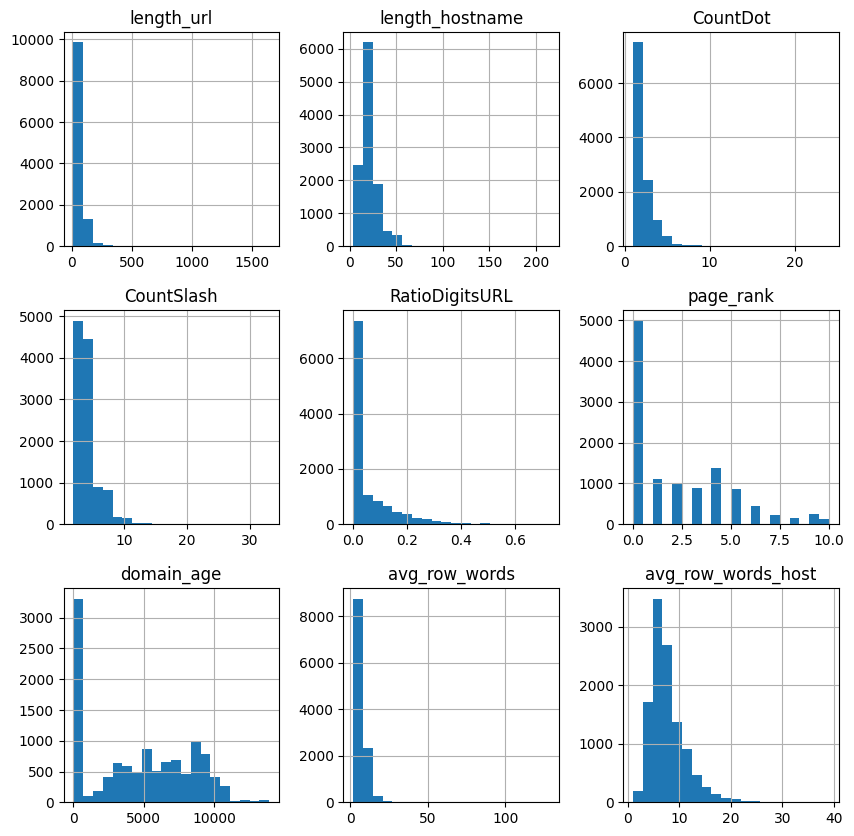

In [16]:
labels=["length_url","length_hostname","CountDot","CountSlash","RatioDigitsURL","page_rank","domain_age","avg_row_words","avg_row_words_host"]
#Plotting the data distribution
data[labels].hist(bins = 20,figsize = (10,10))
plt.show()

**Ma trận tương quan**

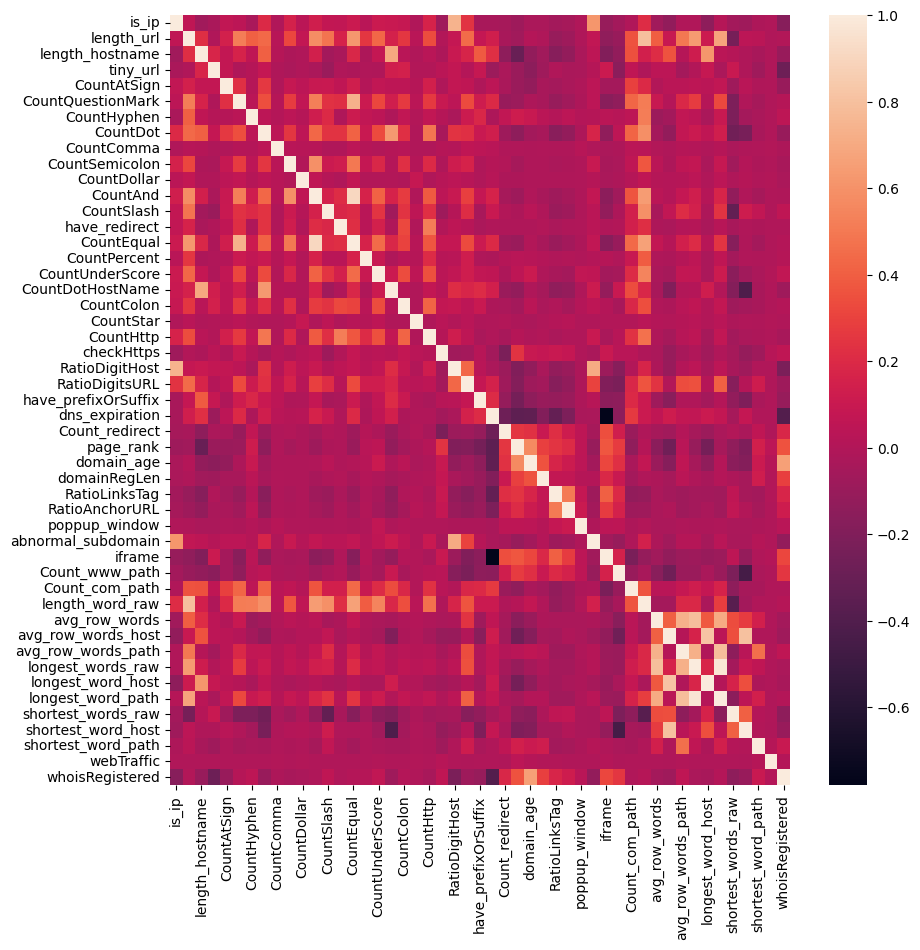

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data[data.columns[2:]].corr())
plt.show()

In [18]:
data.isnull().sum()

url                    0
status                 0
is_ip                  0
length_url             0
length_hostname        0
tiny_url               0
CountAtSign            0
CountQuestionMark      0
CountHyphen            0
CountDot               0
CountComma             0
CountSemicolon         0
CountDollar            0
CountAnd               0
CountSlash             0
have_redirect          0
CountEqual             0
CountPercent           0
CountUnderScore        0
CountDotHostName       0
CountColon             0
CountStar              0
CountHttp              0
checkHttps             0
RatioDigitHost         0
RatioDigitsURL         0
have_prefixOrSuffix    0
dns_expiration         0
Count_redirect         0
page_rank              0
domain_age             0
domainRegLen           0
RatioLinksTag          0
RatioAnchorURL         0
poppup_window          0
abnormal_subdomain     0
iframe                 0
Count_www_path         0
Count_com_path         0
length_word_raw        0


In [19]:
count = data.status.value_counts()

In [20]:
x = count.index
x

Index(['legitimate', 'phishing'], dtype='object', name='status')

Text(0, 0.5, 'Count')

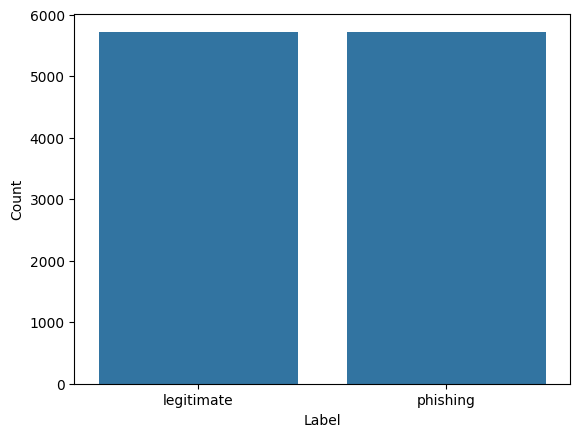

In [21]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Label')
plt.ylabel('Count')

/home/ngovi/phishing-detection/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25312 (\N{CJK UNIFIED IDEOGRAPH-62E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ngovi/phishing-detection/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20613 (\N{CJK UNIFIED IDEOGRAPH-5085}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ngovi/phishing-detection/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ngovi/phishing-detection/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ngovi/phishing-detection/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canva

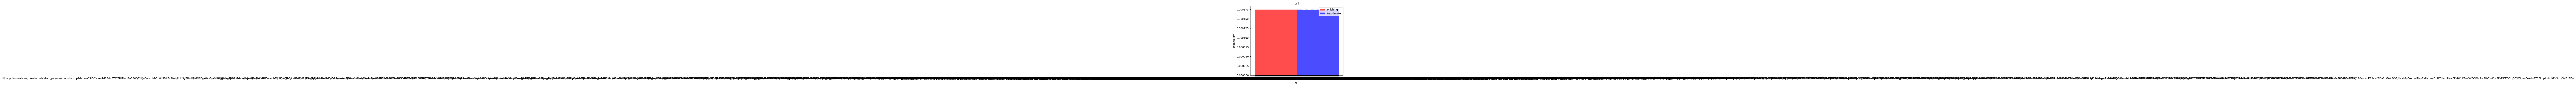

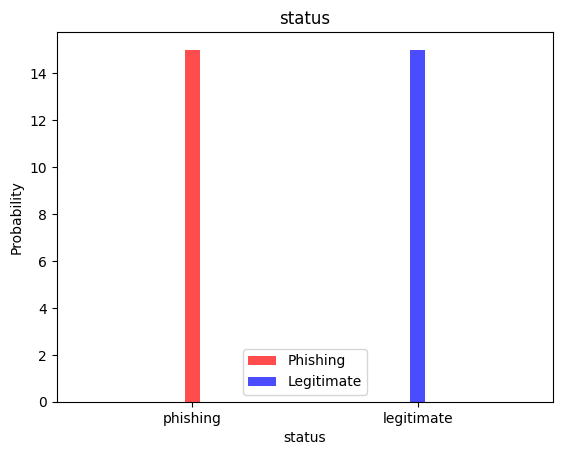

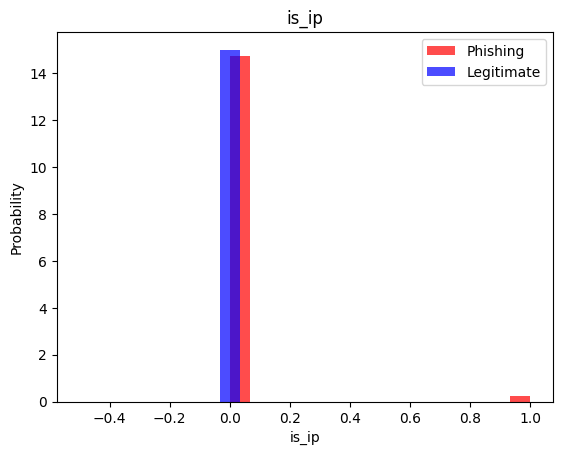

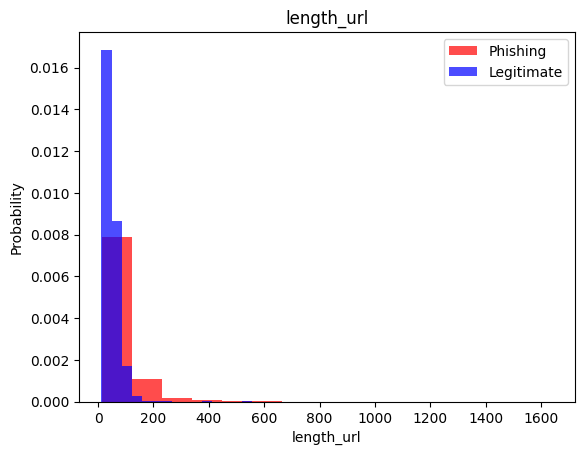

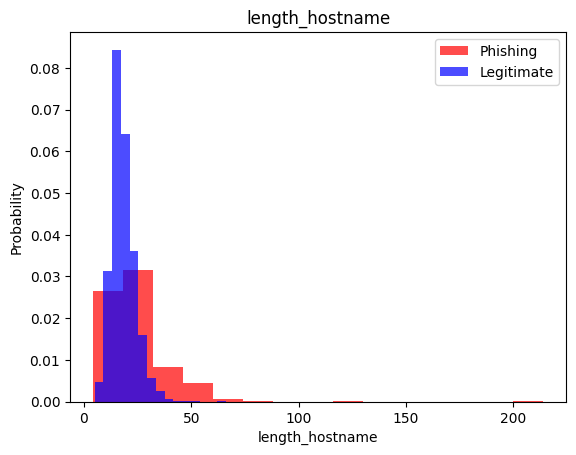

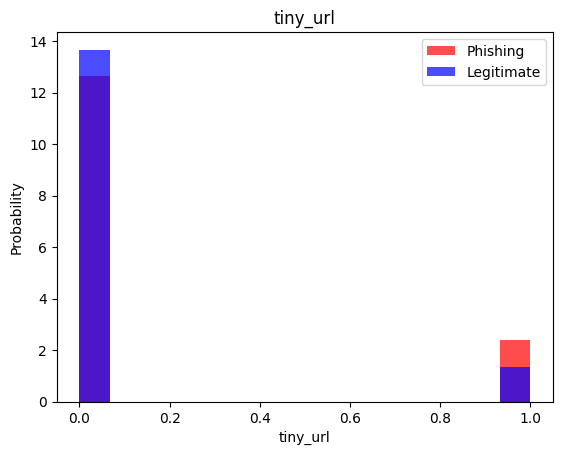

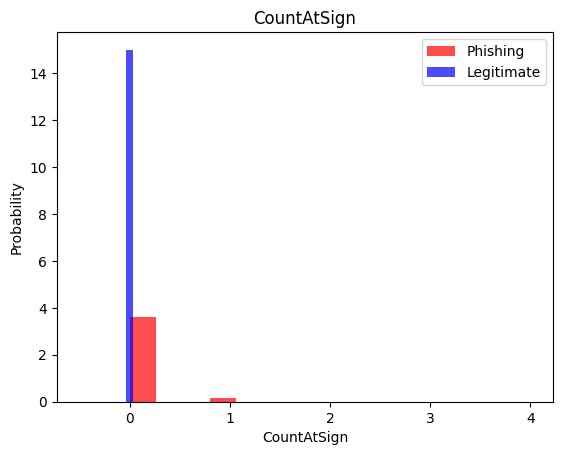

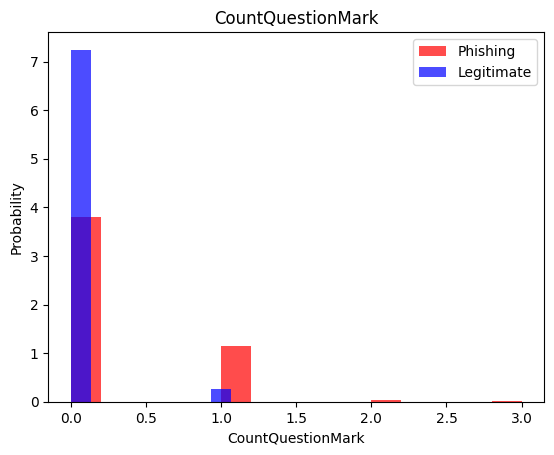

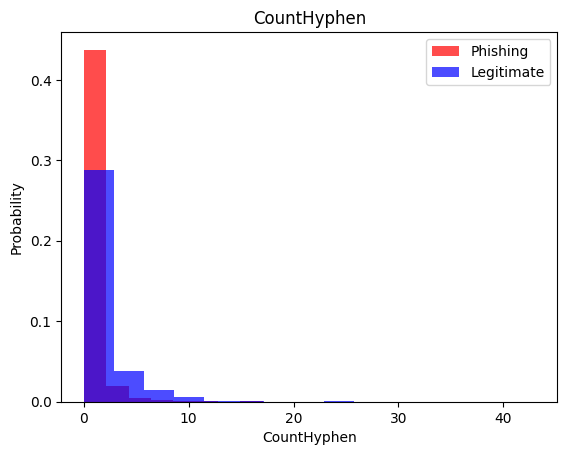

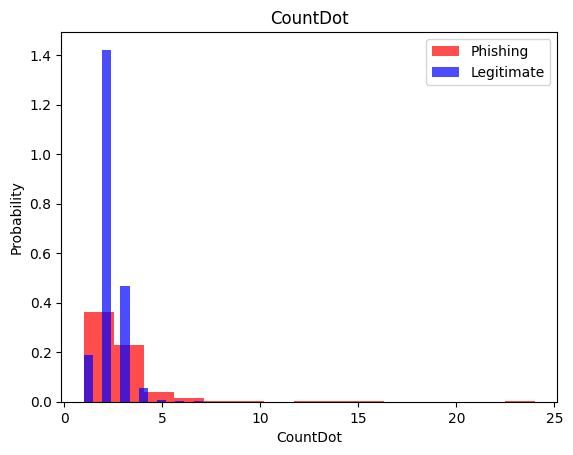

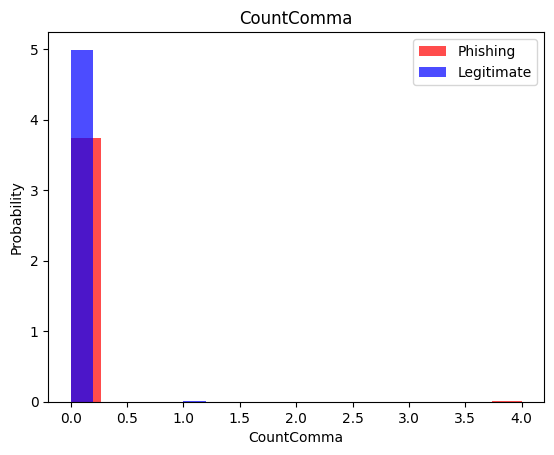

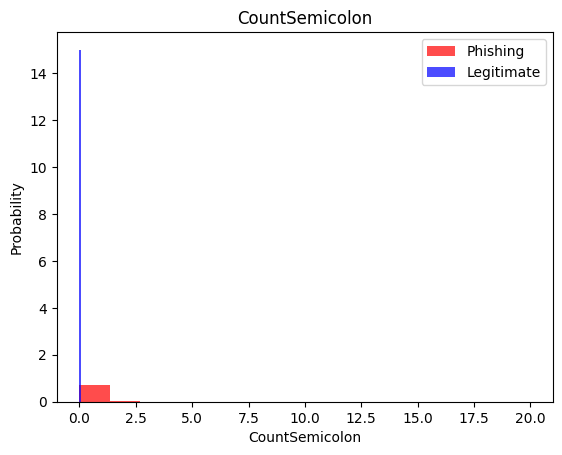

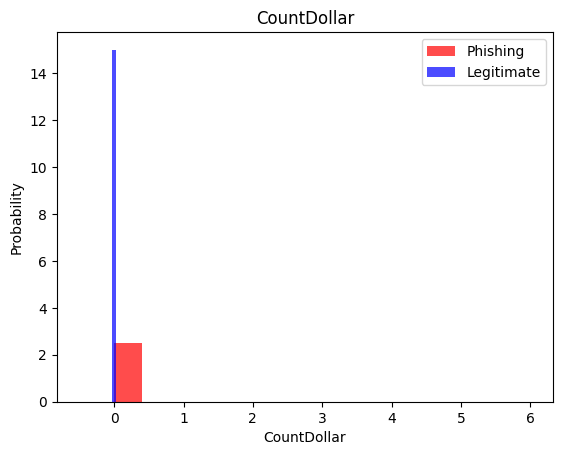

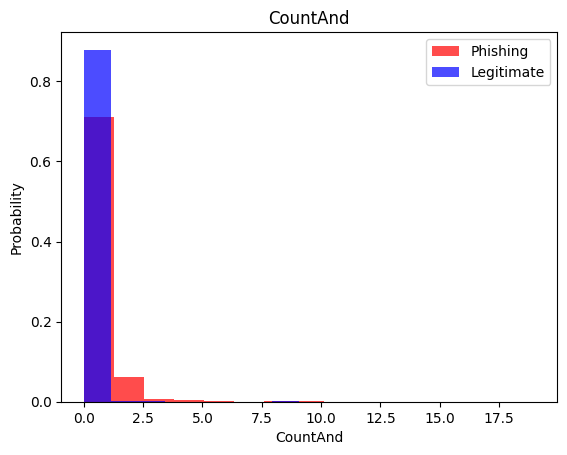

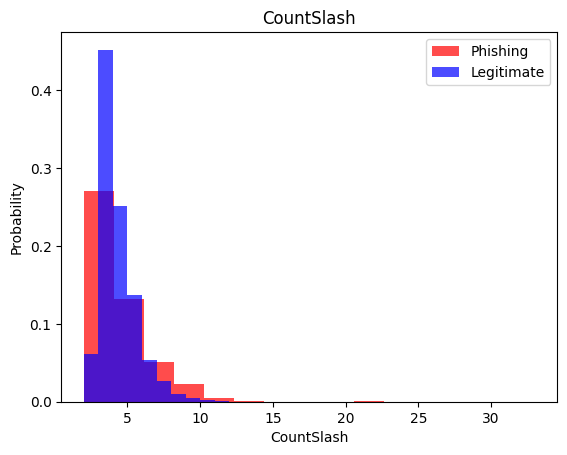

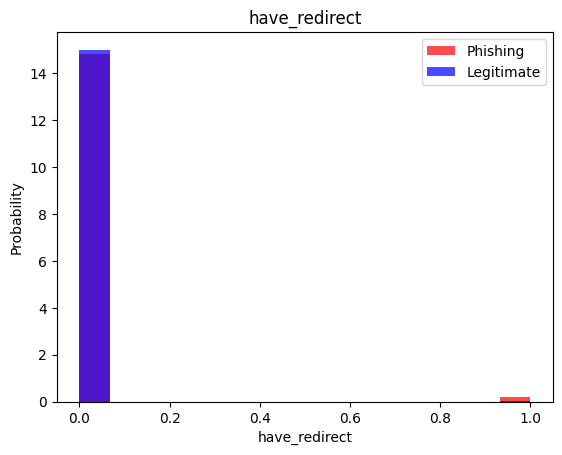

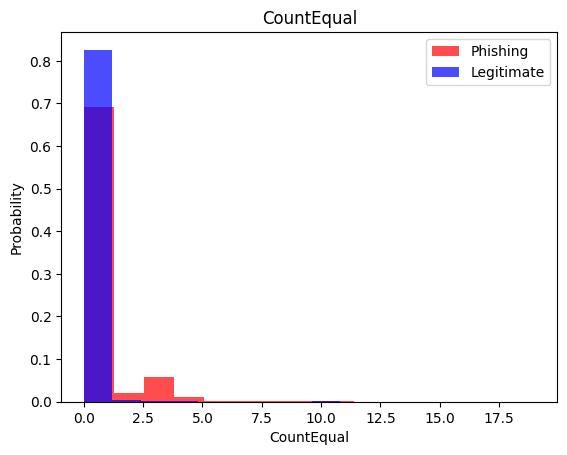

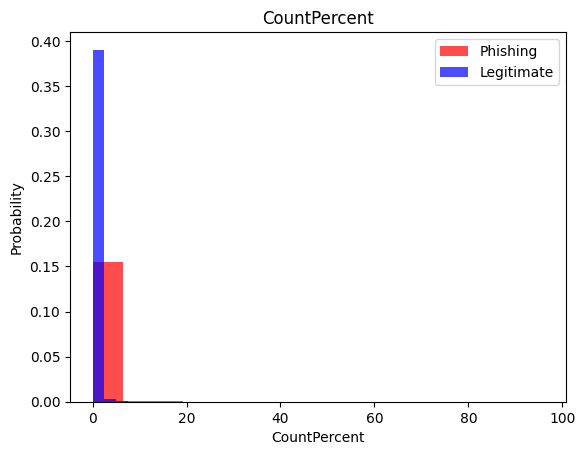

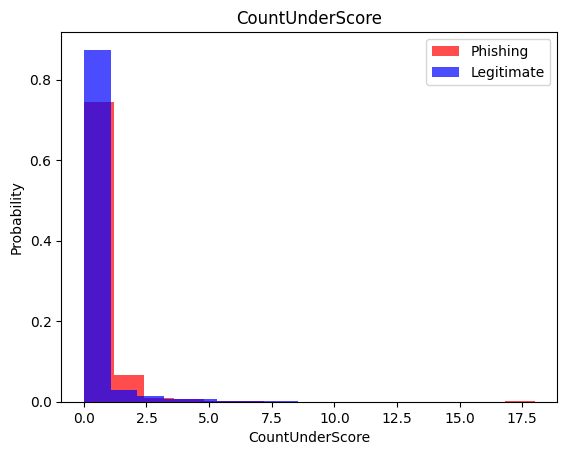

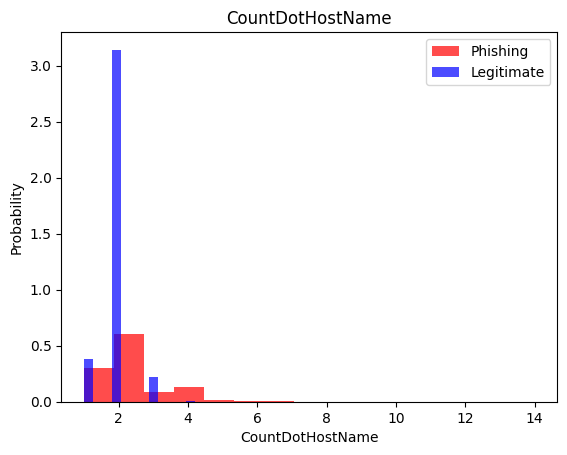

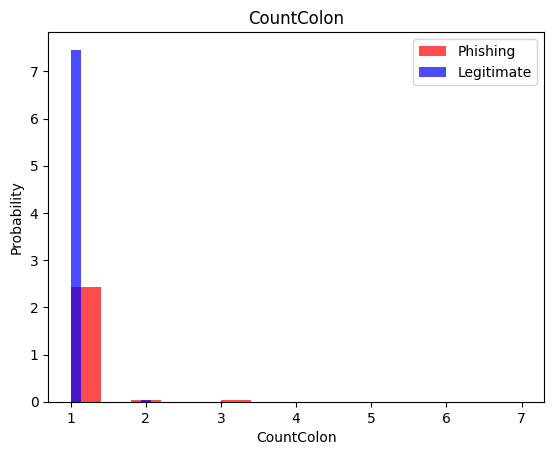

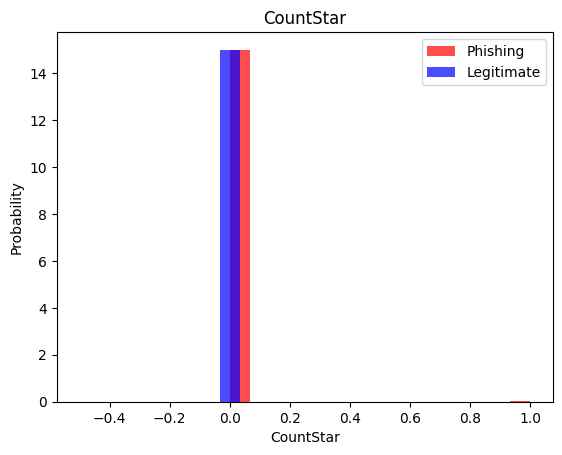

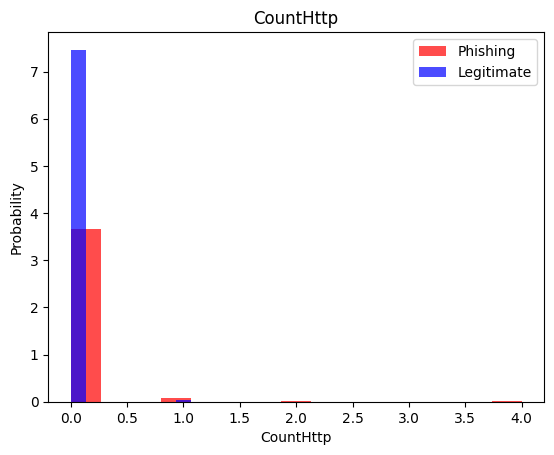

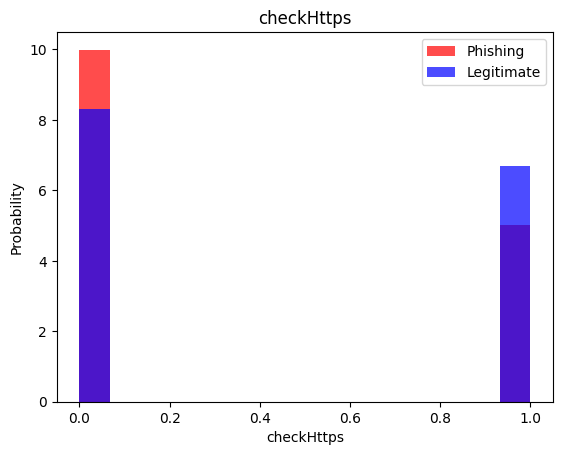

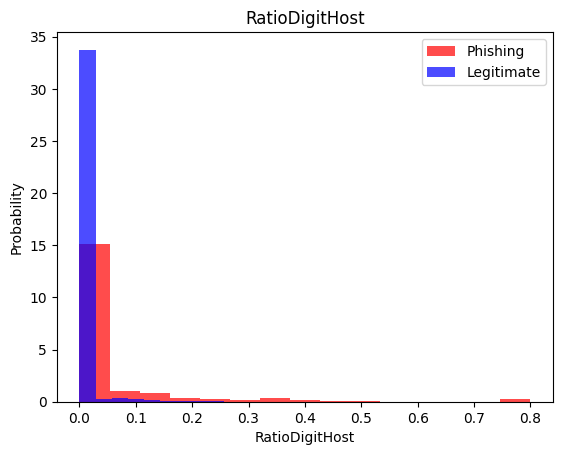

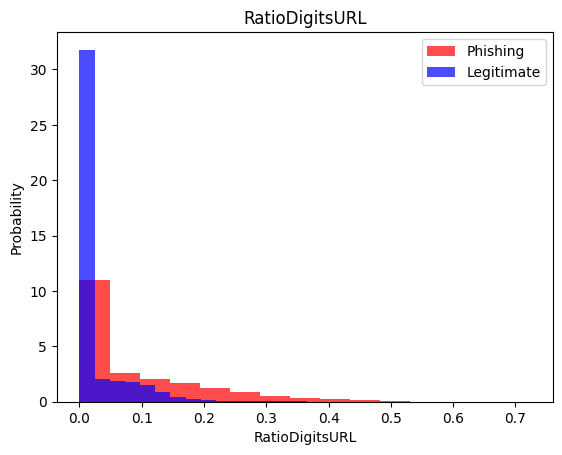

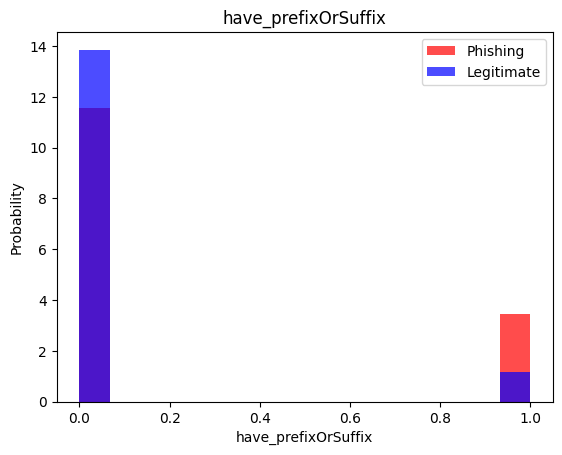

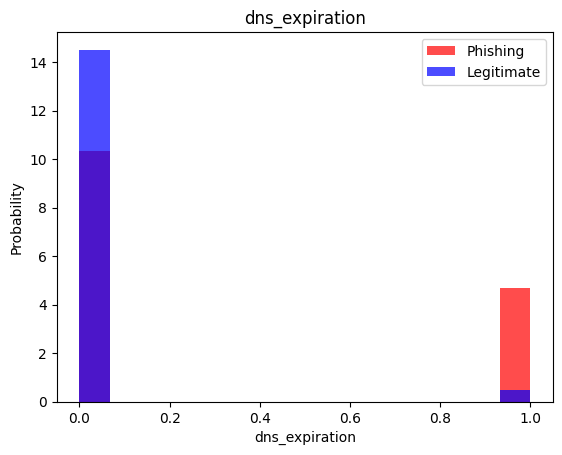

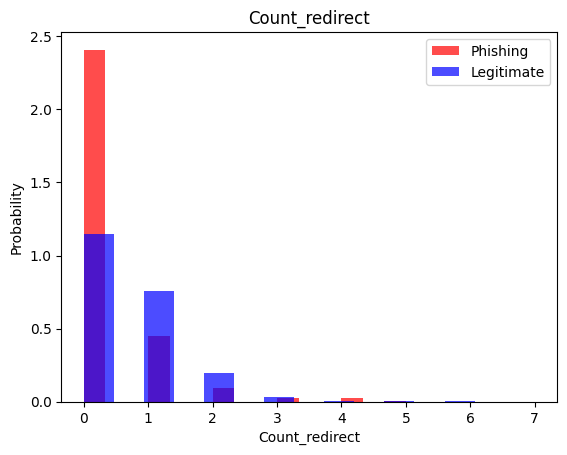

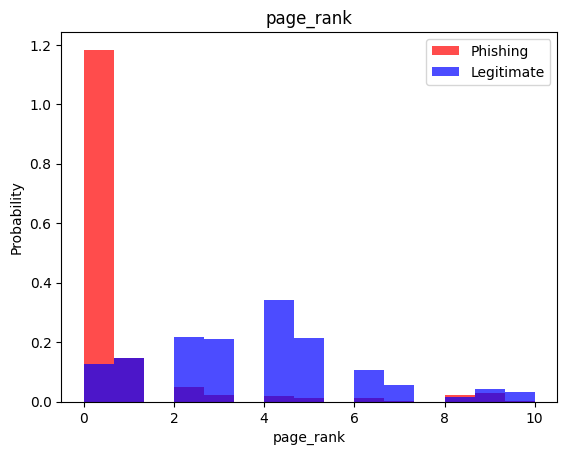

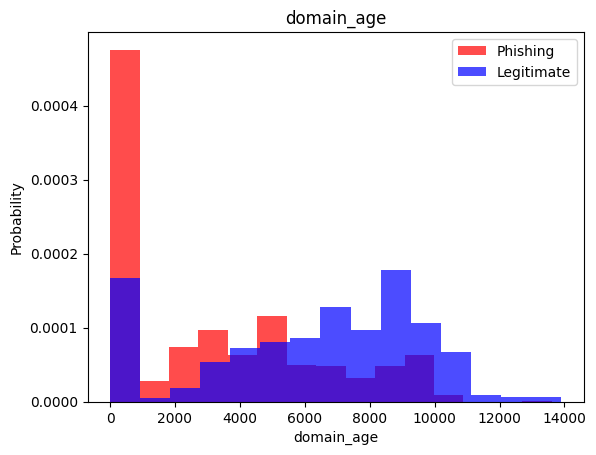

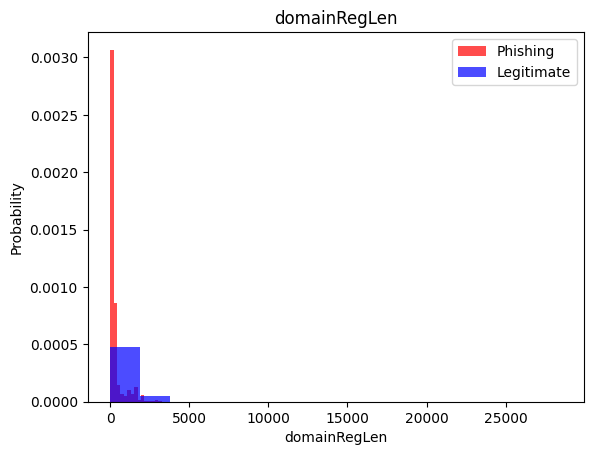

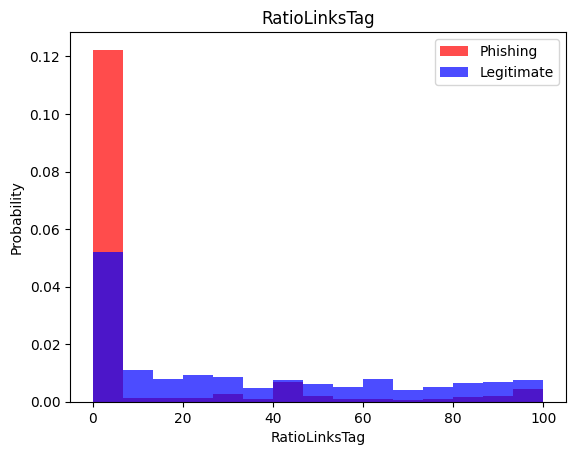

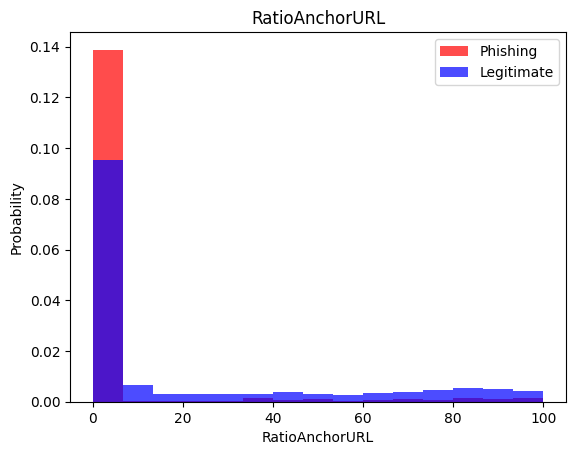

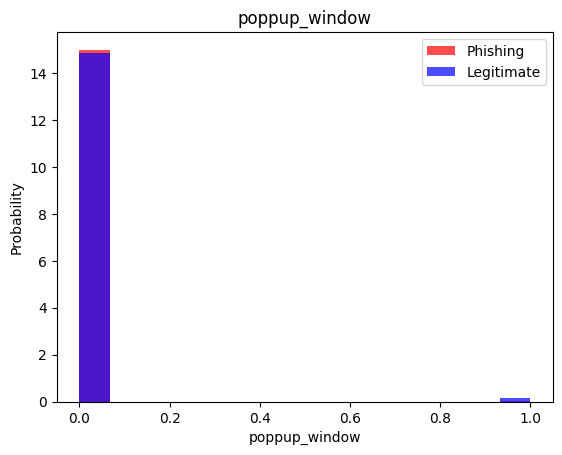

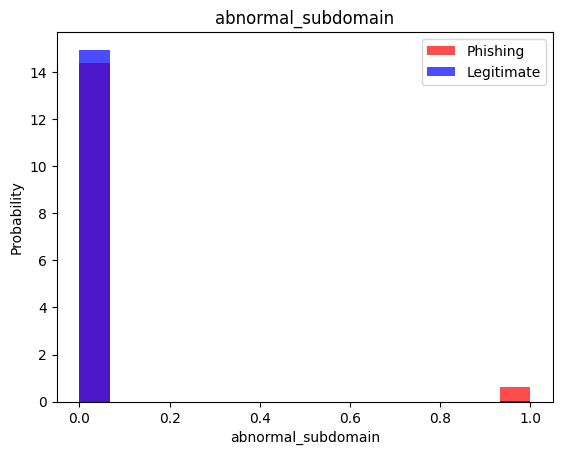

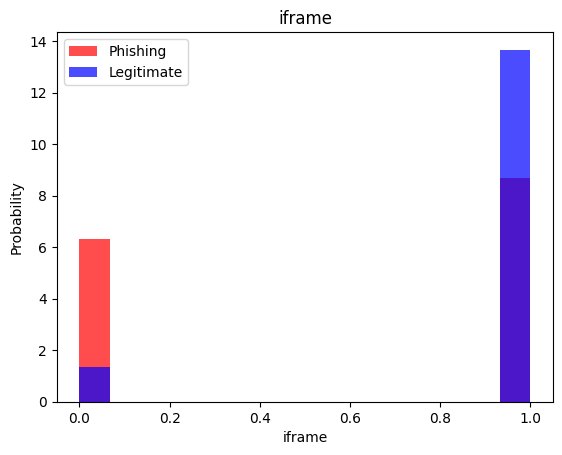

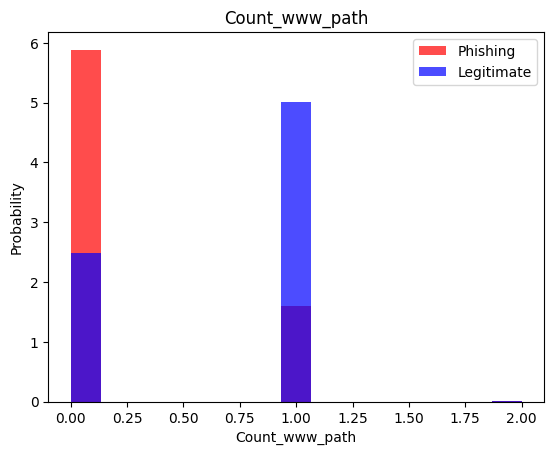

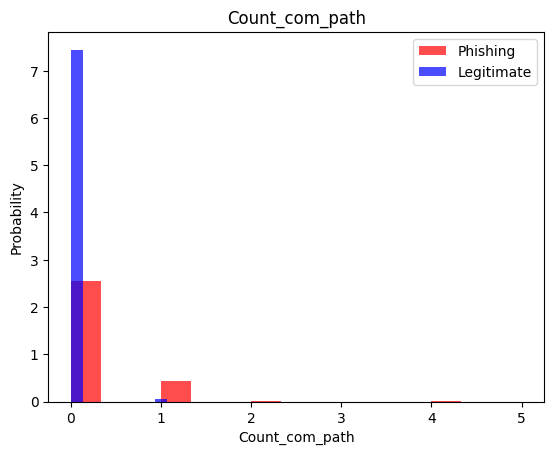

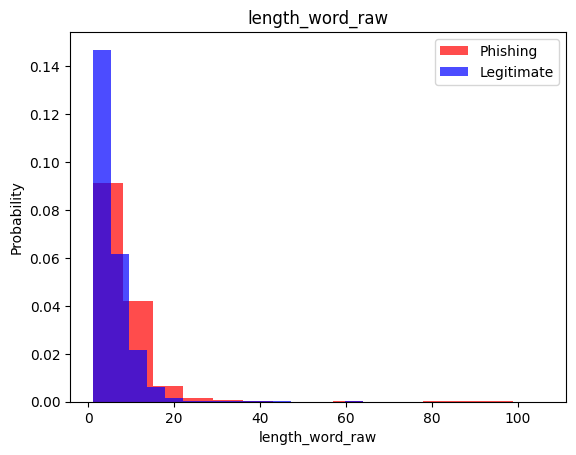

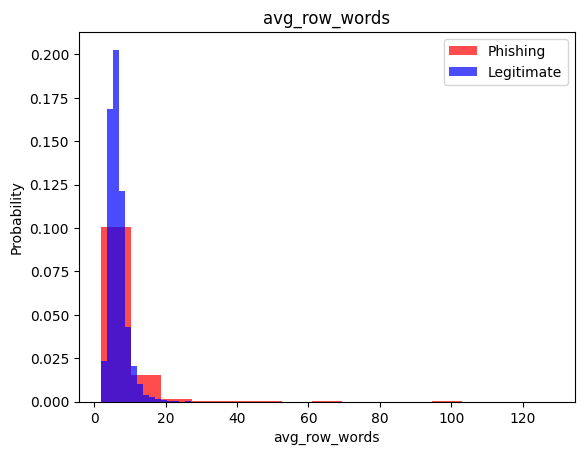

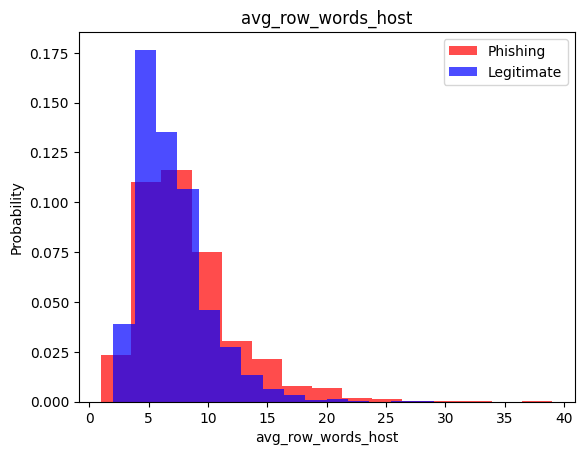

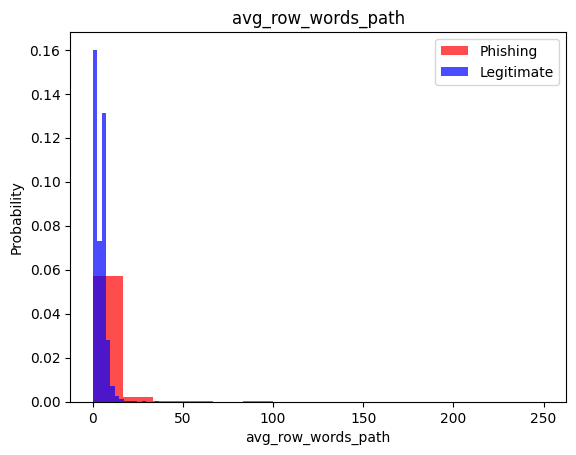

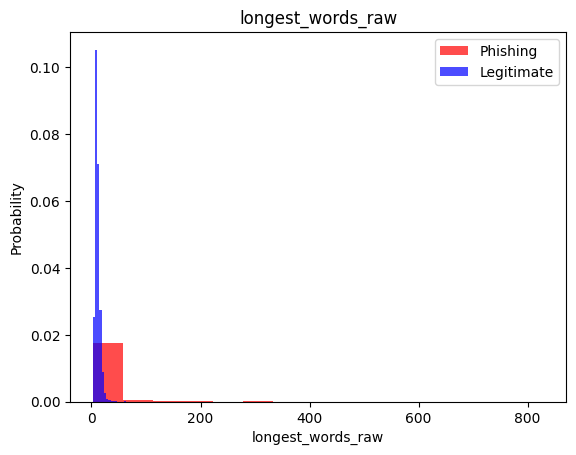

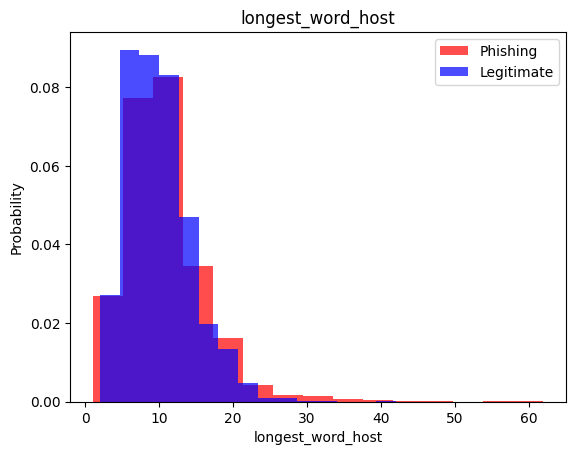

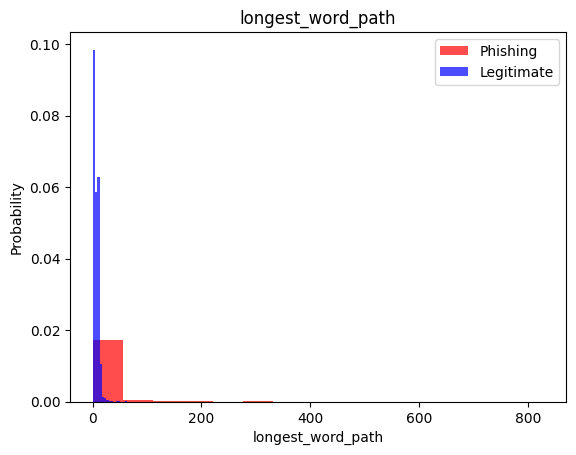

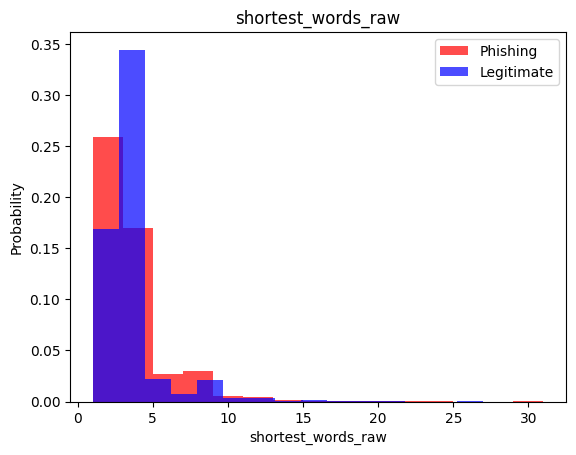

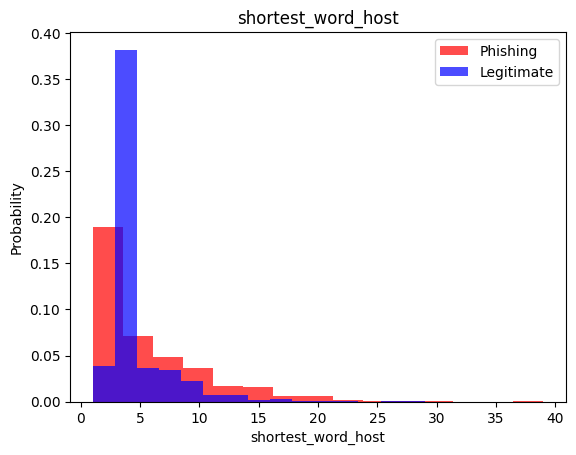

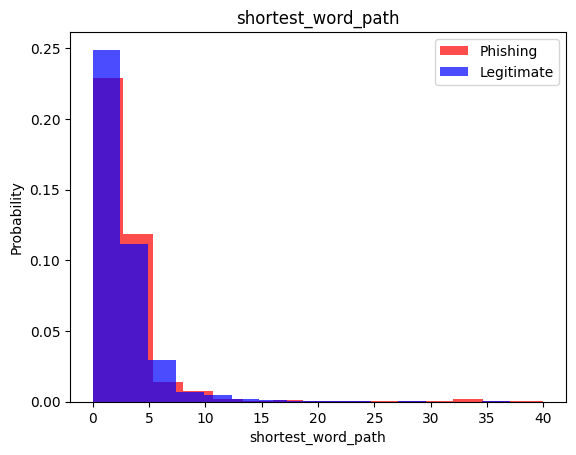

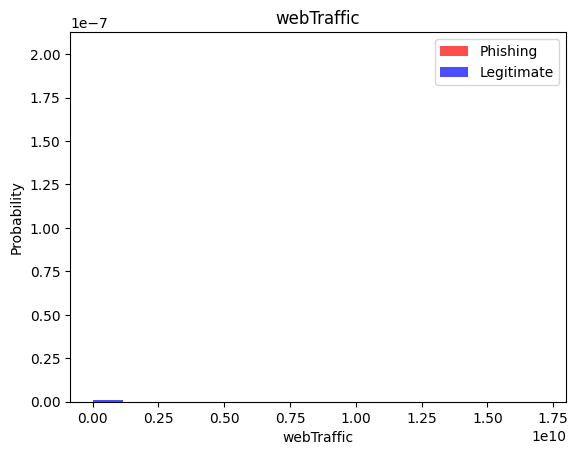

In [22]:
for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(data[data['status']=='phishing'][label], color='red', label="Phishing", alpha=0.7, density=True, bins=15)
  plt.hist(data[data['status']=='legitimate'][label], color='blue', label="Legitimate", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [23]:
data['status'] = data['status'].map({'phishing': 1, 'legitimate': 0})

In [24]:
X = data.drop(['url', 'status'], axis=1).values
y = data['status'].values

#Scale data

In [26]:
scaler = MinMaxScaler()
# fit scaler into data
scaler.fit(X)
# start scale
X = scaler.transform(X)


In [28]:
df = np.hstack((np.reshape(y, (-1, 1)), X))
transformed_df = pd.DataFrame(df, columns=data.columns[1:])

In [29]:
data1 = data.drop(['url', 'status'], axis=1)

0


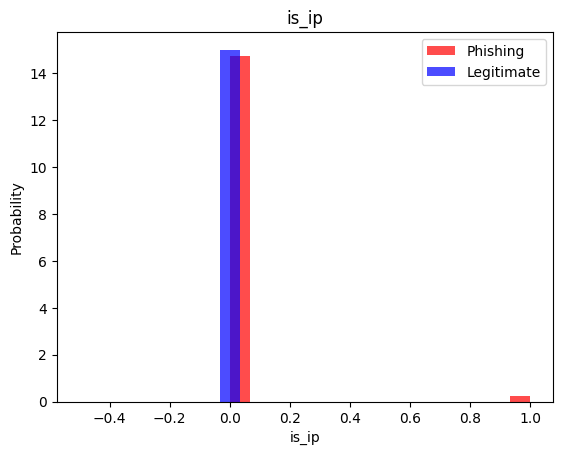

1


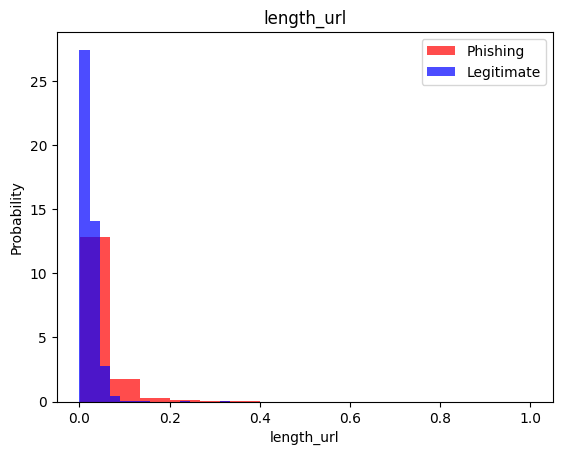

2


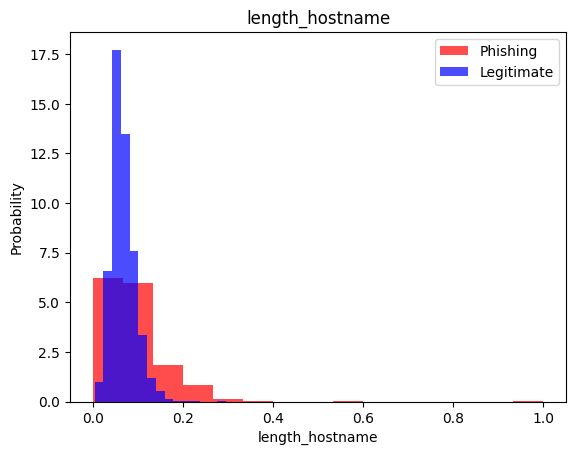

3


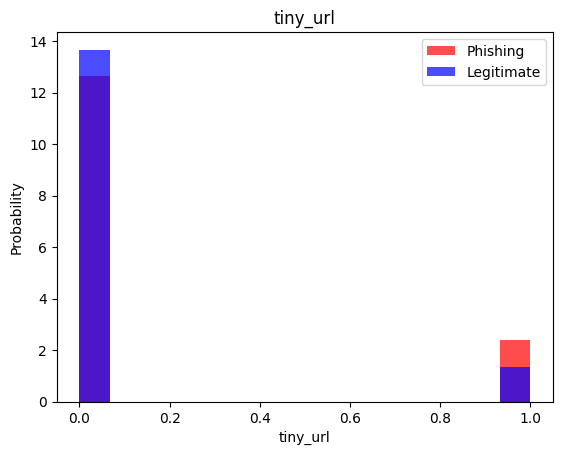

4


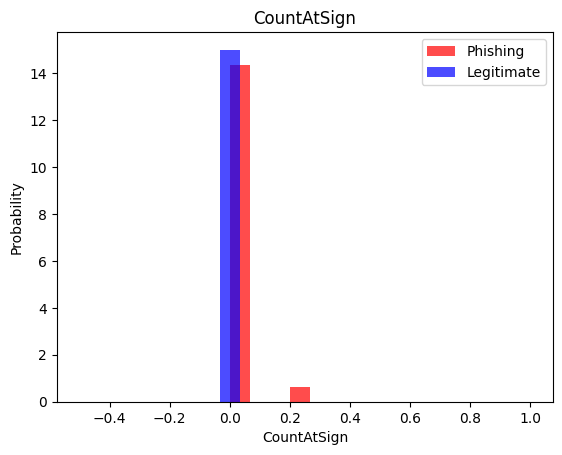

5


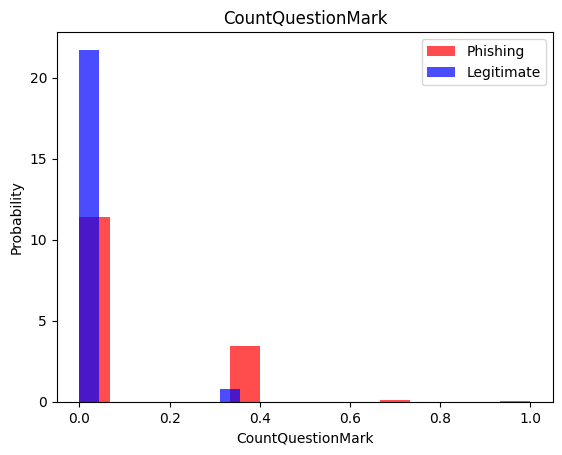

6


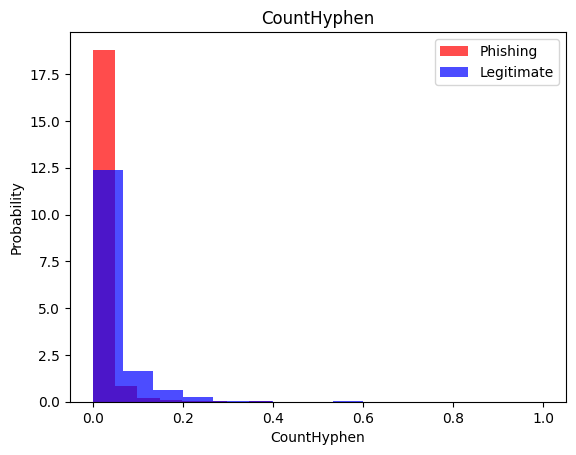

7


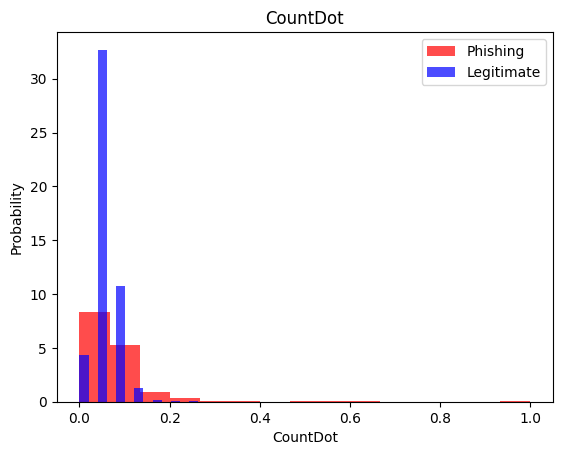

8


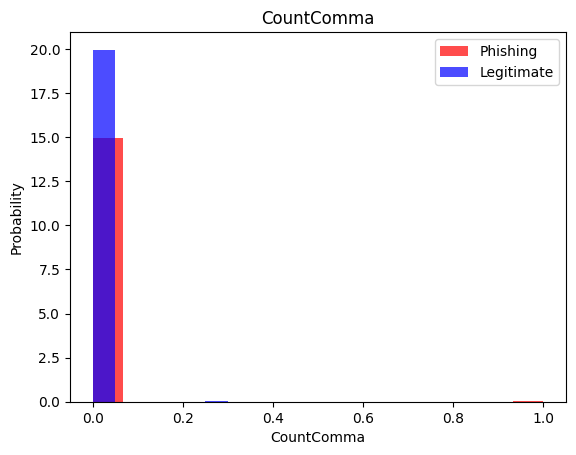

9


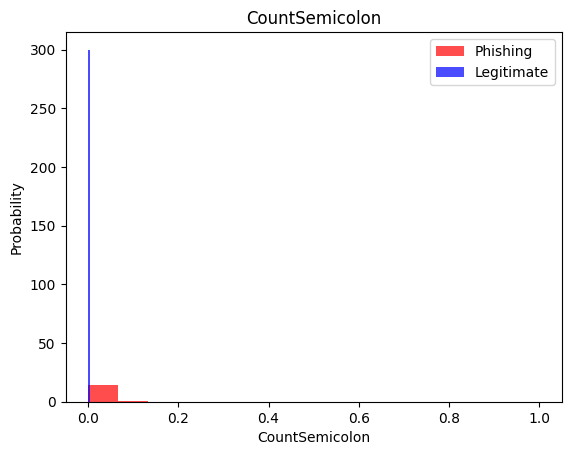

10


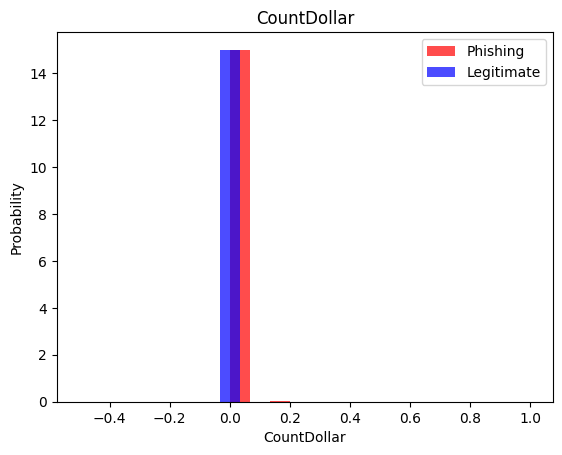

11


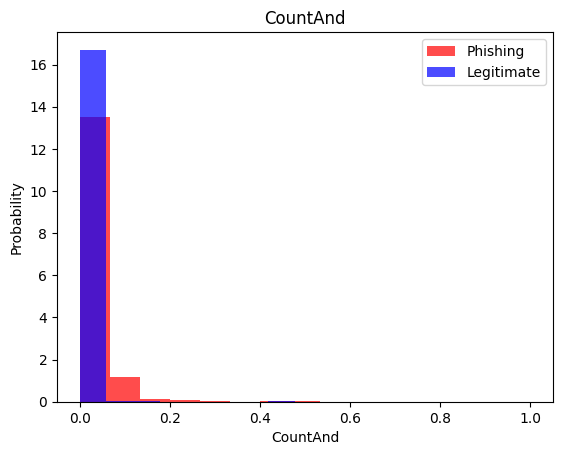

12


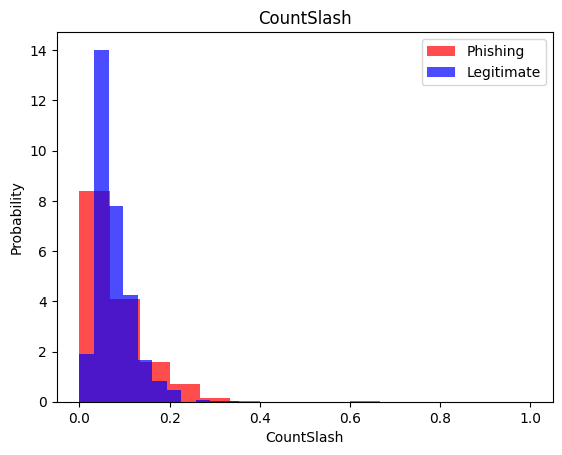

13


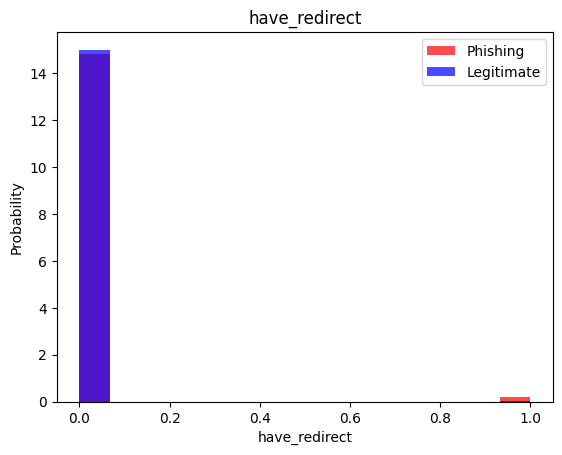

14


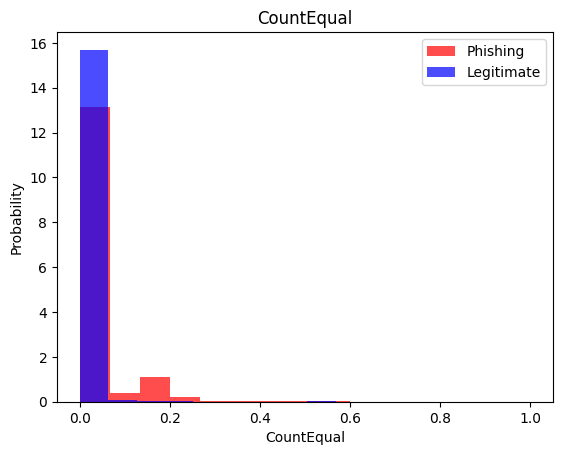

15


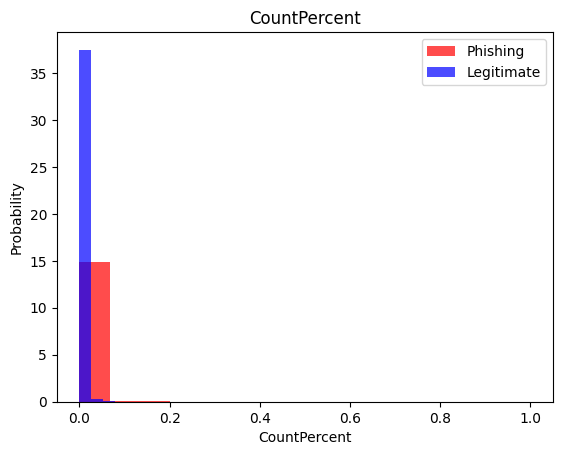

16


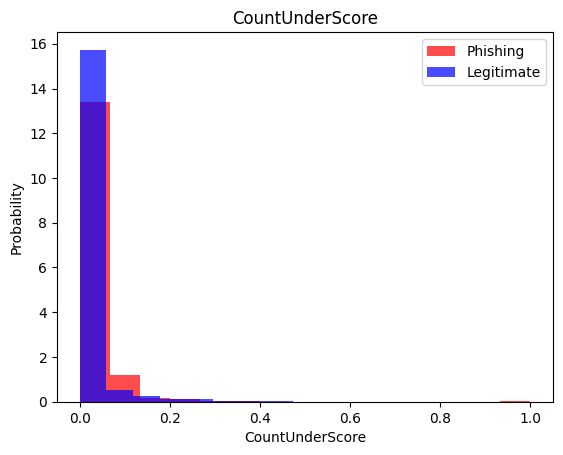

17


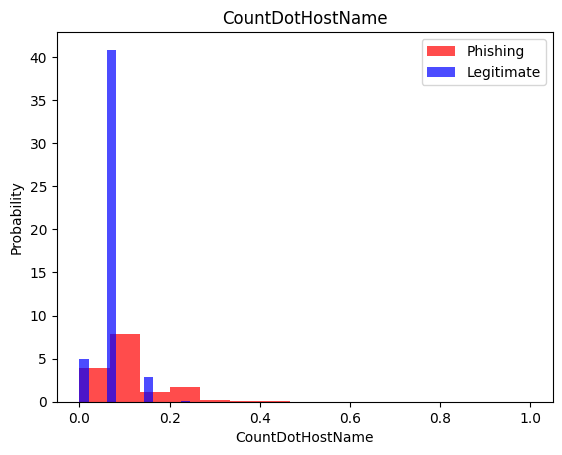

18


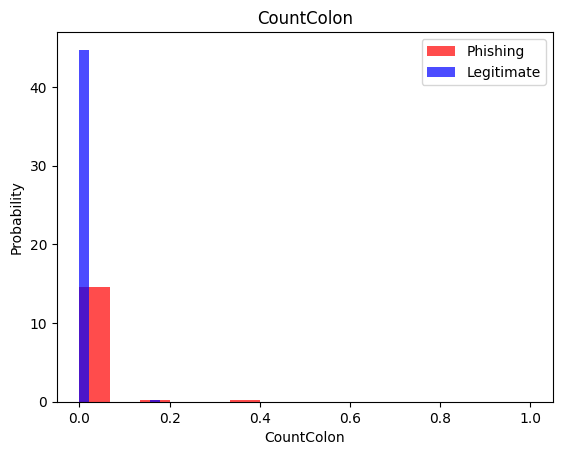

19


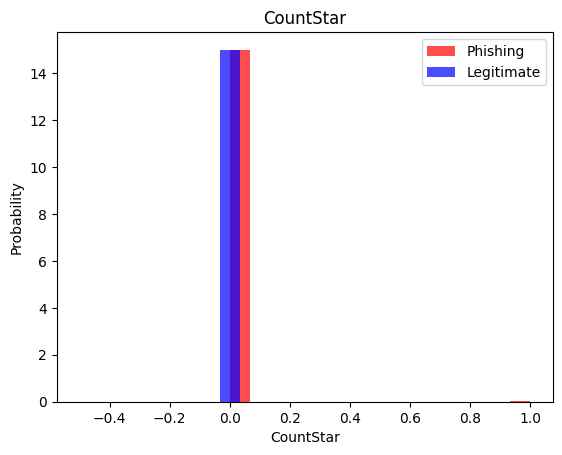

20


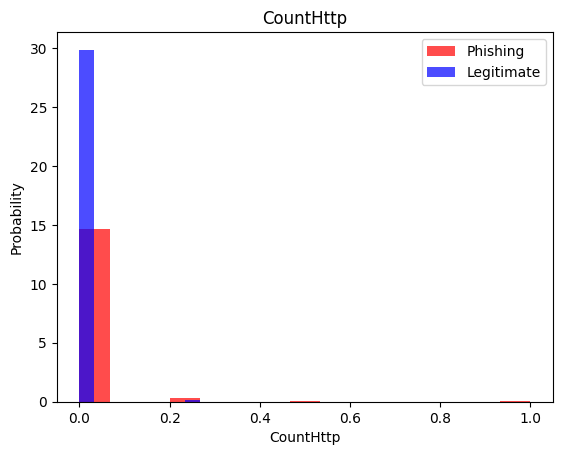

21


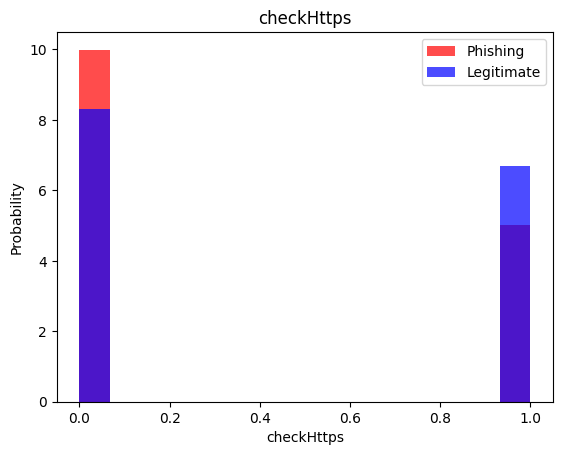

22


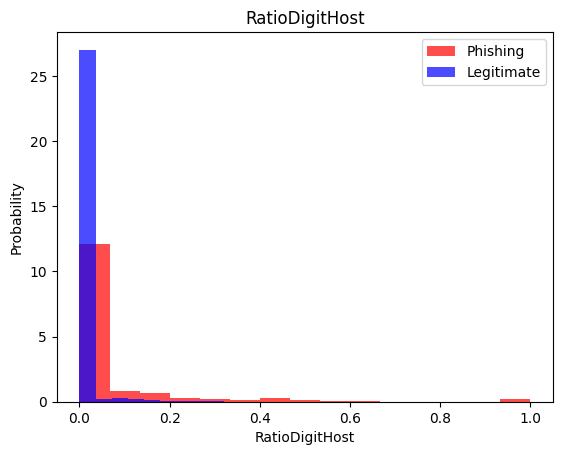

23


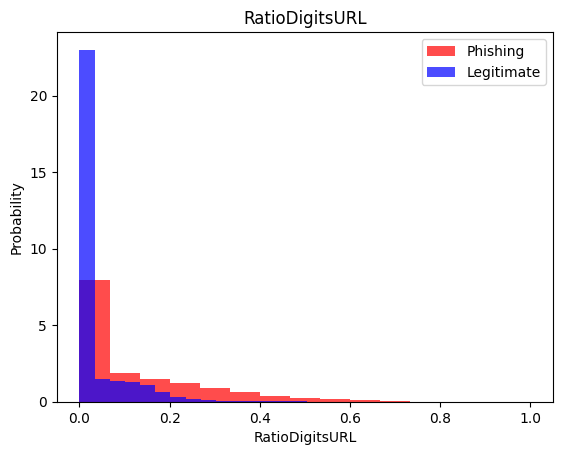

24


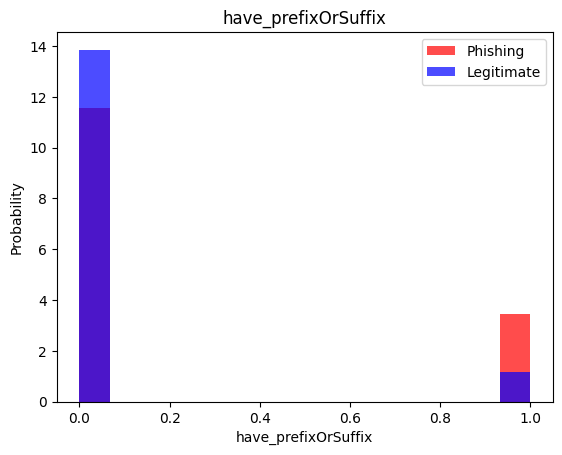

25


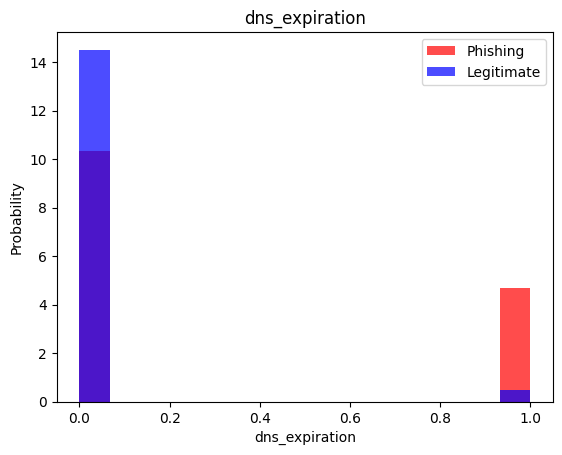

26


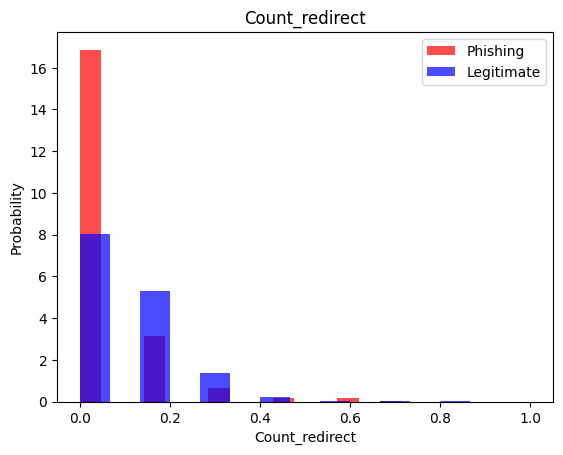

27


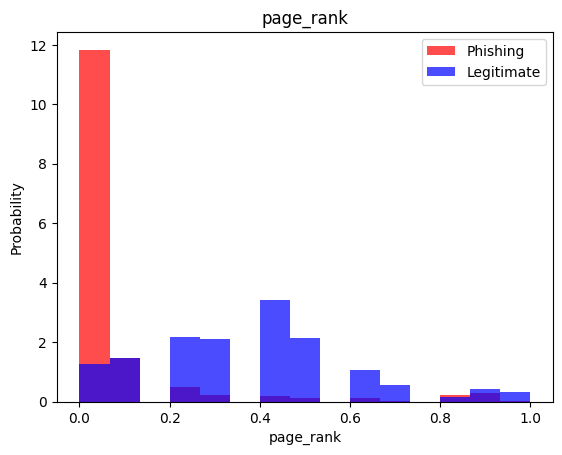

28


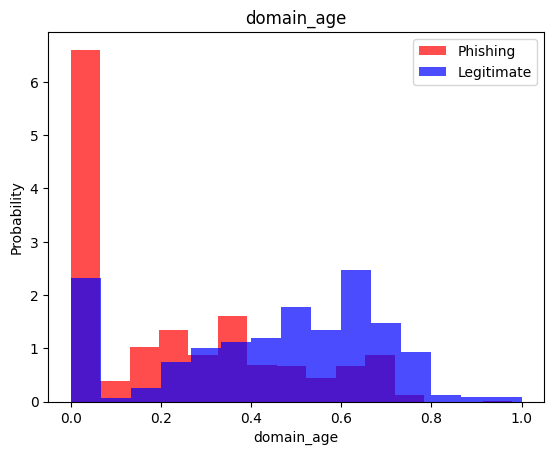

29


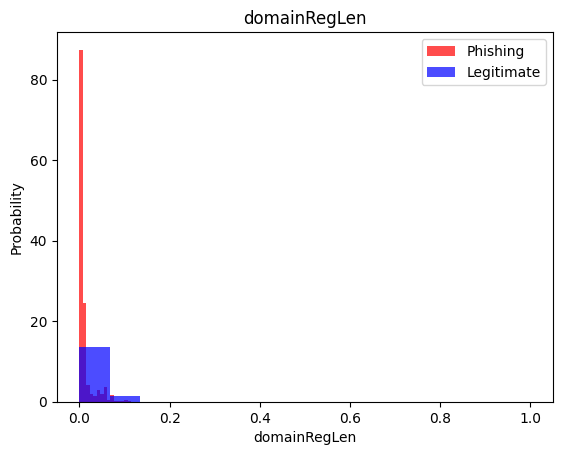

30


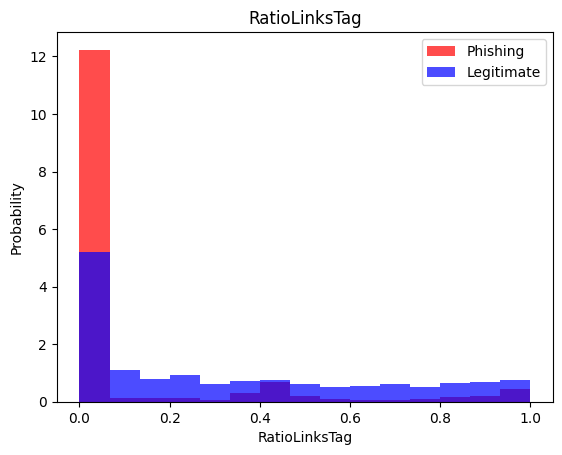

31


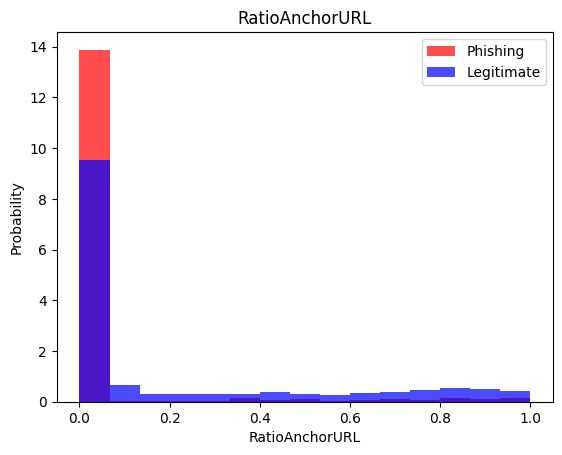

32


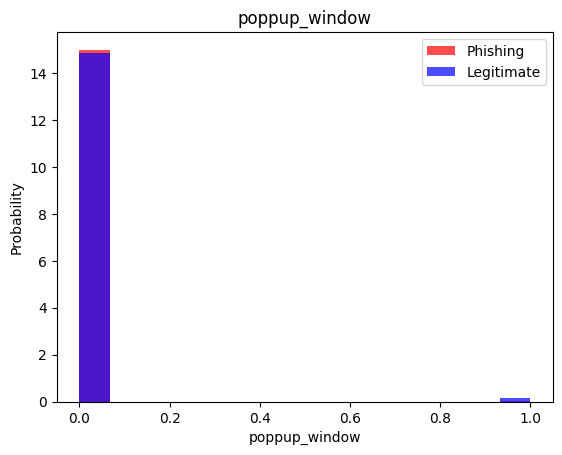

33


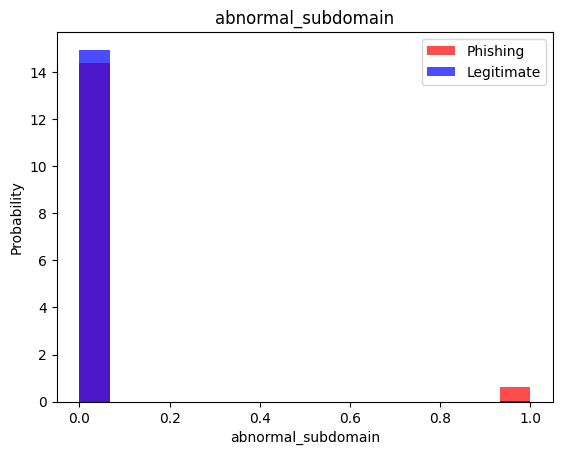

34


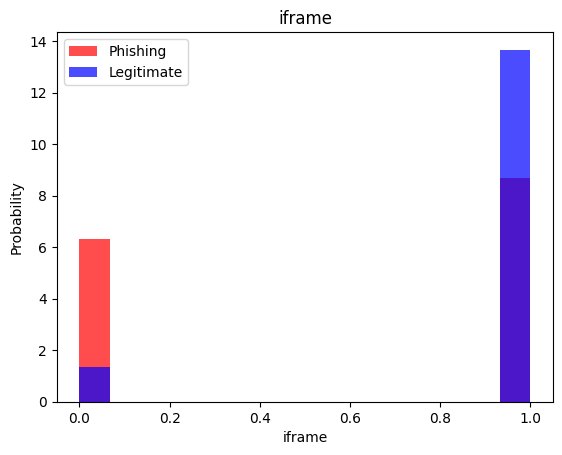

35


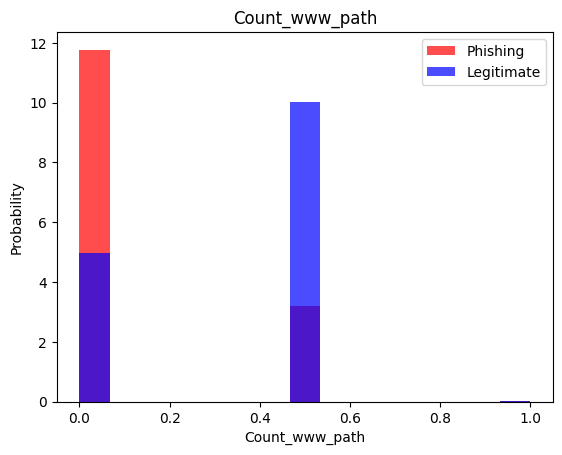

36


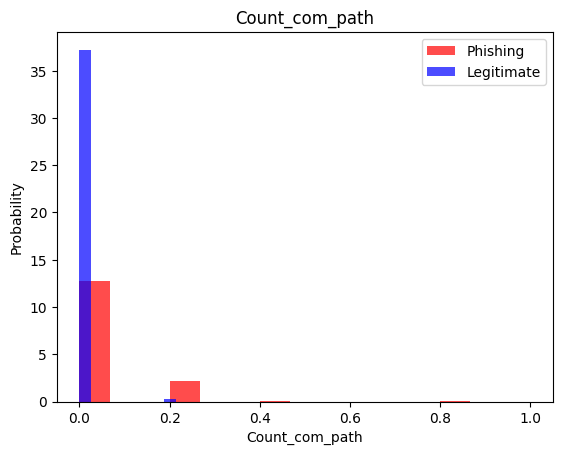

37


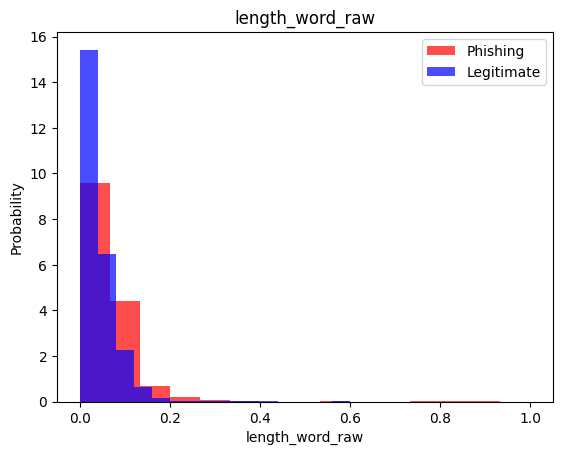

38


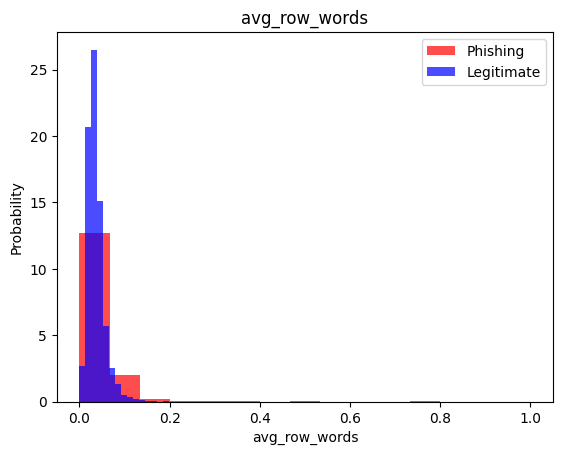

39


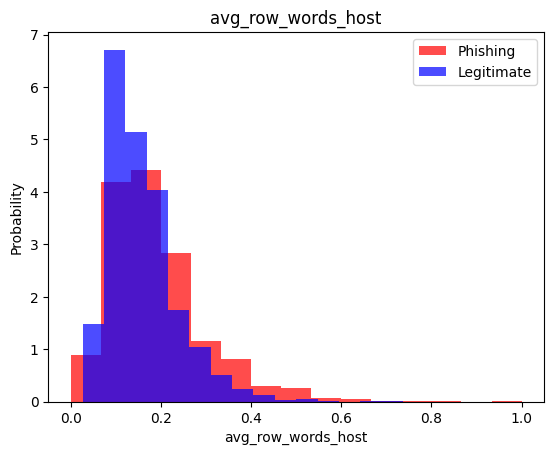

40


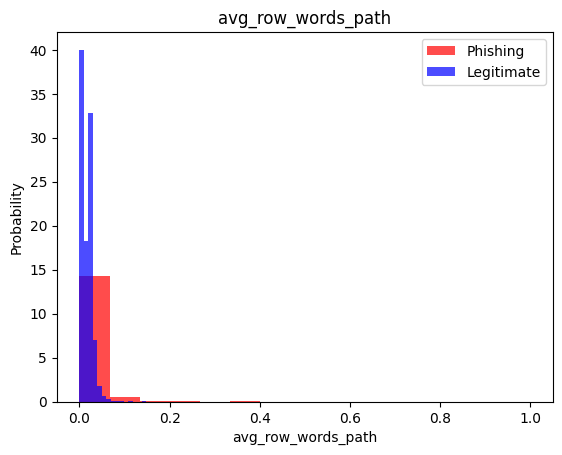

41


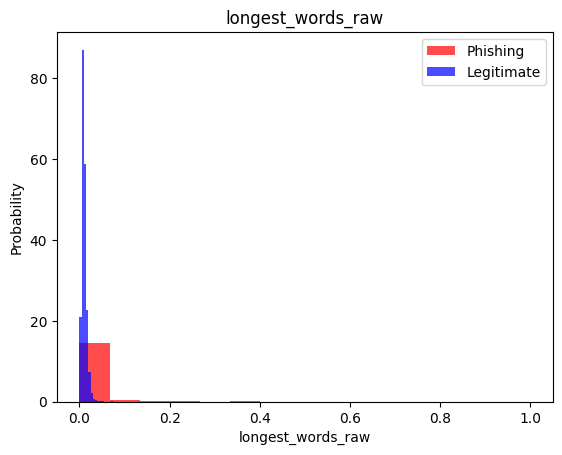

42


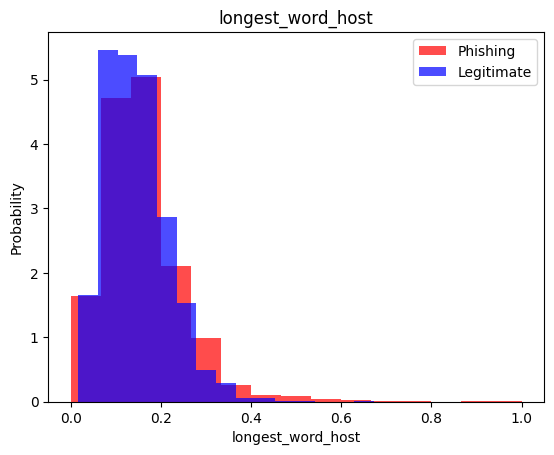

43


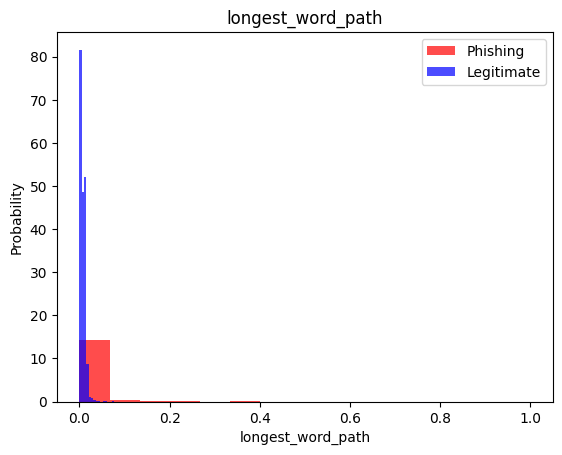

44


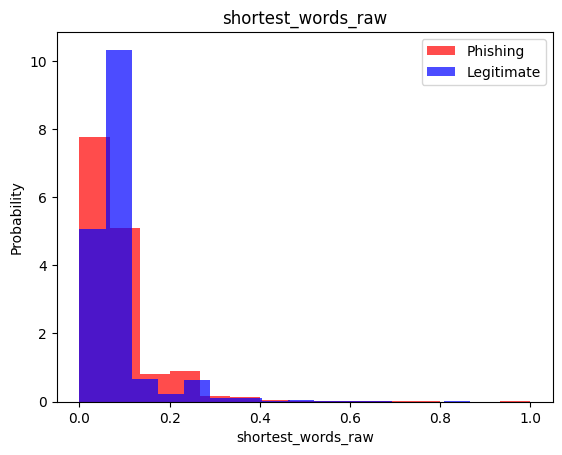

45


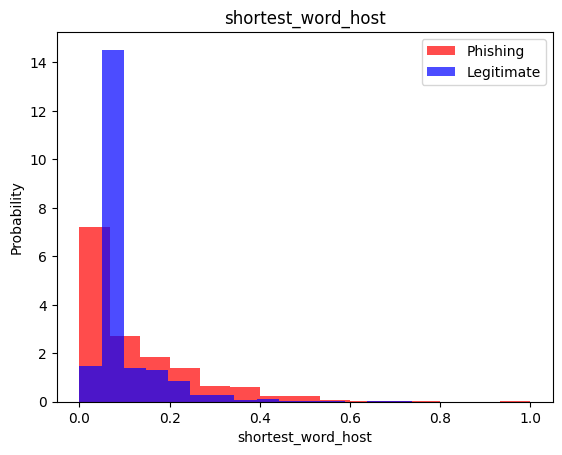

46


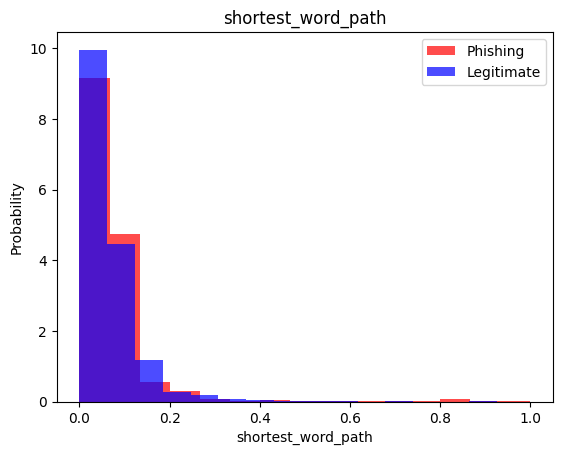

47


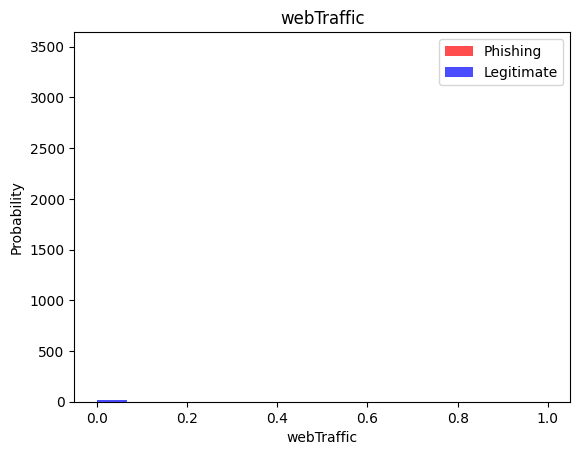

48


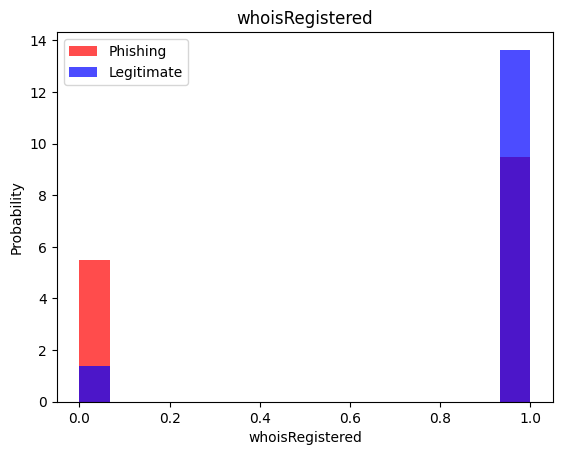

In [30]:
for i in range(len(data1.columns)):
  label = data1.columns[i]
  print(i)
  plt.hist(transformed_df[transformed_df['status']==1][label], color='red', label="Phishing", alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['status']==0][label], color='blue', label="Legitimate", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train model

In [577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Store result

In [578]:
model_list = []
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

def set_result(model, acc, f1, recall, precision):
  model_list.append(model)
  accuracy_list.append(round(acc,3))
  f1_score_list.append(round(f1,3))
  recall_list.append(round(recall,3))
  precision_list.append(round(precision,3))

#Neural Network

In [579]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(49,)))  # hidden layer with 128 neural
model.add(Dense(64, activation='relu'))  # another hidden layer with 64 neural
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer with 1 neural     

/home/ngovi/phishing-detection/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [580]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [581]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
287/287 - 2s - 6ms/step - accuracy: 0.8692 - loss: 0.3171
Epoch 2/30
287/287 - 0s - 1ms/step - accuracy: 0.9261 - loss: 0.1978
Epoch 3/30
287/287 - 0s - 2ms/step - accuracy: 0.9309 - loss: 0.1766
Epoch 4/30
287/287 - 0s - 2ms/step - accuracy: 0.9391 - loss: 0.1648
Epoch 5/30
287/287 - 0s - 2ms/step - accuracy: 0.9466 - loss: 0.1510
Epoch 6/30
287/287 - 0s - 1ms/step - accuracy: 0.9487 - loss: 0.1434
Epoch 7/30
287/287 - 0s - 2ms/step - accuracy: 0.9482 - loss: 0.1376
Epoch 8/30
287/287 - 0s - 1ms/step - accuracy: 0.9514 - loss: 0.1318
Epoch 9/30
287/287 - 0s - 1ms/step - accuracy: 0.9529 - loss: 0.1272
Epoch 10/30
287/287 - 0s - 2ms/step - accuracy: 0.9556 - loss: 0.1235
Epoch 11/30
287/287 - 0s - 1ms/step - accuracy: 0.9586 - loss: 0.1179
Epoch 12/30
287/287 - 0s - 2ms/step - accuracy: 0.9559 - loss: 0.1168
Epoch 13/30
287/287 - 0s - 1ms/step - accuracy: 0.9600 - loss: 0.1106
Epoch 14/30
287/287 - 1s - 2ms/step - accuracy: 0.9593 - loss: 0.1075
Epoch 15/30
287/287 - 1s - 2m

In [582]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.16267594695091248
Accuracy: 0.9471615552902222


In [583]:
nn_pred = model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [584]:
y_pred = np.round(nn_pred).astype(int)

In [585]:
y_pred = y_pred.reshape(-1)

In [586]:
pd.DataFrame({'y_test': y_test, 'predict': y_pred})

,y_test,predict
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
2285,0,0
2286,0,0
2287,1,1
2288,1,1


In [587]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1132
           1       0.95      0.95      0.95      1158

    accuracy                           0.95      2290
   macro avg       0.95      0.95      0.95      2290
weighted avg       0.95      0.95      0.95      2290


In [588]:
acc_score_nn = accuracy_score(y_pred, y_test)
f1_score_nn = f1_score(y_pred, y_test)
recall_score_nn = recall_score(y_pred, y_test)
precision_score_nn = precision_score(y_pred, y_test)

In [589]:
set_result('NN', acc_score_nn, f1_score_nn, recall_score_nn, precision_score_nn)

#Random Forest

In [669]:
randomForest = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=3, min_samples_leaf=2)
model_rf = randomForest.fit(X_train, y_train)

In [670]:
rf_predict = model_rf.predict(X_test)

In [662]:
pd.DataFrame({'y_test': y_test, 'predict': rf_predict})

,y_test,predict
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
2285,0,0
2286,0,0
2287,1,1
2288,1,1


In [647]:
acc_score_rf = accuracy_score(rf_predict, y_test)
f1_score_rf = f1_score(rf_predict, y_test)
recall_score_rf = recall_score(rf_predict, y_test)
precision_score_rf = precision_score(rf_predict, y_test)

In [671]:
print(classification_report(rf_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1124
           1       0.96      0.95      0.96      1166

    accuracy                           0.95      2290
   macro avg       0.95      0.95      0.95      2290
weighted avg       0.95      0.95      0.95      2290


In [610]:
set_result('RF', acc_score_rf, f1_score_rf, recall_score_rf, precision_score_rf)

#DescisionTree

In [611]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3)

In [612]:
dt_model = dt.fit(X_train, y_train)

In [613]:
dt_predict = dt_model.predict(X_test)

In [614]:
pd.DataFrame({'y_test': y_test, 'predict': dt_predict})

,y_test,predict
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
2285,0,0
2286,0,0
2287,1,1
2288,1,1


In [615]:
print(classification_report(dt_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1133
           1       0.94      0.94      0.94      1157

    accuracy                           0.94      2290
   macro avg       0.94      0.94      0.94      2290
weighted avg       0.94      0.94      0.94      2290


In [616]:
acc_score_dt = accuracy_score(dt_predict, y_test)
f1_score_dt = f1_score(dt_predict, y_test)
recall_score_dt = recall_score(dt_predict, y_test)
precision_score_dt = precision_score(dt_predict, y_test)

set_result('DT', acc_score_dt, f1_score_dt,
           recall_score_dt, precision_score_dt)

#Support vector machine

In [617]:
#linear kernel
linear_svm = SVC(kernel="linear")
linear_svm_model = linear_svm.fit(X_train, y_train)
linear_svm_predict = linear_svm_model.predict(X_test)

pd.DataFrame({'y_test': y_test, 'predict': linear_svm_predict})

print(classification_report(linear_svm_predict, y_test))

acc_score_svm_linear = accuracy_score(linear_svm_predict, y_test)
f1_score_svm_linear = f1_score(linear_svm_predict, y_test)
recall_score_svm_linear = recall_score(linear_svm_predict, y_test)
precision_score_svm_linear = precision_score(linear_svm_predict, y_test)

set_result('SVM_Linear', acc_score_svm_linear, f1_score_svm_linear,
           recall_score_svm_linear, precision_score_svm_linear)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1124
           1       0.91      0.90      0.91      1166

    accuracy                           0.90      2290
   macro avg       0.90      0.90      0.90      2290
weighted avg       0.90      0.90      0.90      2290


In [618]:
#RBF kernel
rbf_svm = SVC(kernel="rbf")
rbf_svm_model = rbf_svm.fit(X_train, y_train)
rbf_svm_predict = rbf_svm_model.predict(X_test)

pd.DataFrame({'y_test': y_test, 'predict': rbf_svm_predict})

print(classification_report(rbf_svm_predict, y_test))

acc_score_svm_rbf = accuracy_score(rbf_svm_predict, y_test)
f1_score_svm_rbf = f1_score(rbf_svm_predict, y_test)
recall_score_svm_rbf = recall_score(rbf_svm_predict, y_test)
precision_score_svm_rbf = precision_score(rbf_svm_predict, y_test)

set_result('SVM_RBF', acc_score_svm_rbf, f1_score_svm_rbf,
           recall_score_svm_rbf, precision_score_svm_rbf)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1103
           1       0.93      0.91      0.92      1187

    accuracy                           0.92      2290
   macro avg       0.92      0.92      0.92      2290
weighted avg       0.92      0.92      0.92      2290


In [619]:
#Poly kernel
poly_svm = SVC(kernel='poly', gamma=0.1, coef0=1, degree=3)
poly_svm_model = poly_svm.fit(X_train, y_train)
poly_svm_predict = poly_svm_model.predict(X_test)

pd.DataFrame({'y_test': y_test, 'predict': poly_svm_predict})

print(classification_report(poly_svm_predict, y_test))

acc_score_svm_poly = accuracy_score(poly_svm_predict, y_test)
f1_score_svm_poly = f1_score(poly_svm_predict, y_test)
recall_score_svm_poly = recall_score(poly_svm_predict, y_test)
precision_score_svm_poly = precision_score(poly_svm_predict, y_test)

set_result('SVM_Poly', acc_score_svm_poly, f1_score_svm_poly,
           recall_score_svm_poly, precision_score_svm_poly)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1086
           1       0.94      0.90      0.92      1204

    accuracy                           0.92      2290
   macro avg       0.92      0.92      0.92      2290
weighted avg       0.92      0.92      0.92      2290


#Compare models


In [620]:
result = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'F1_Score': f1_score_list,
    'Recall': recall_list,
    'Precision': precision_list
})

In [621]:
result = result.sort_values(by=['Accuracy', 'F1_Score'], ascending=False).reset_index(drop=True)

In [622]:
result

,Model,Accuracy,F1_Score,Recall,Precision
0,RF,0.952,0.953,0.948,0.959
1,NN,0.947,0.948,0.948,0.947
2,DT,0.942,0.943,0.943,0.942
3,SVM_RBF,0.920,0.922,0.911,0.934
4,SVM_Poly,0.916,0.919,0.901,0.937
5,SVM_Linear,0.905,0.906,0.903,0.909


Text(0, 0.5, 'Accuracy')

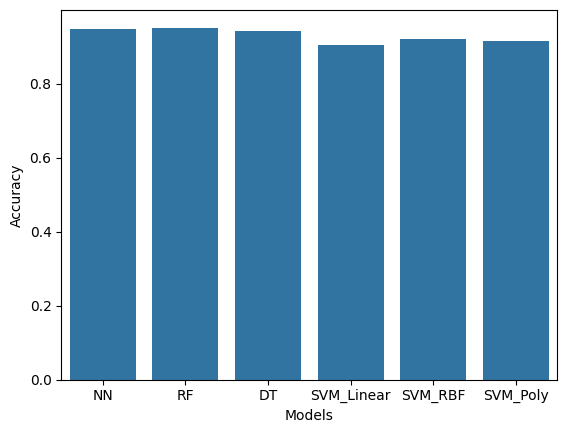

In [623]:
sns.barplot(x=model_list, y=accuracy_list)
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'F1_Score')

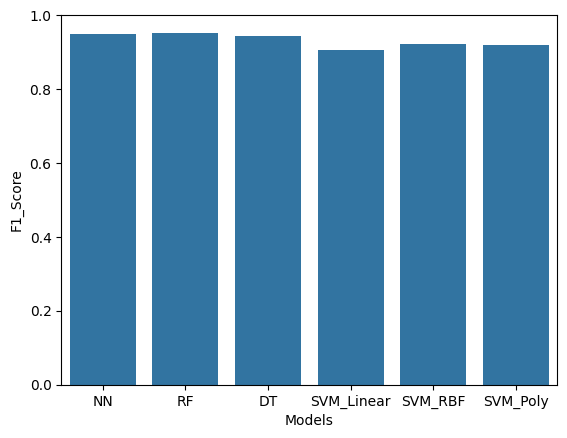

In [624]:
sns.barplot(x=model_list, y=f1_score_list)
plt.xlabel('Models')
plt.ylabel('F1_Score')

Text(0, 0.5, 'Recall')

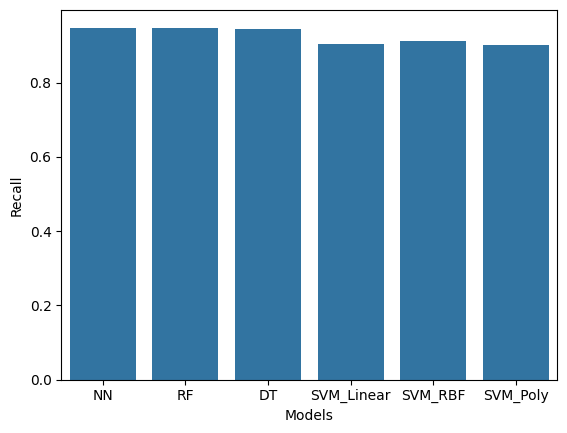

In [625]:
sns.barplot(x=model_list, y=recall_list)
plt.xlabel('Models')
plt.ylabel('Recall')

Text(0, 0.5, 'Precision')

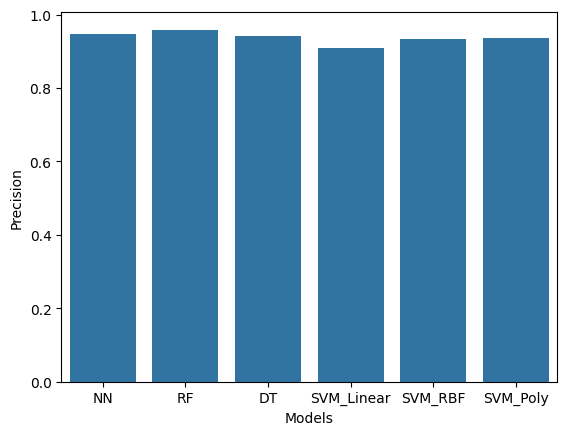

In [626]:
sns.barplot(x=model_list, y=precision_list)
plt.xlabel('Models')
plt.ylabel('Precision')

#Choose best model

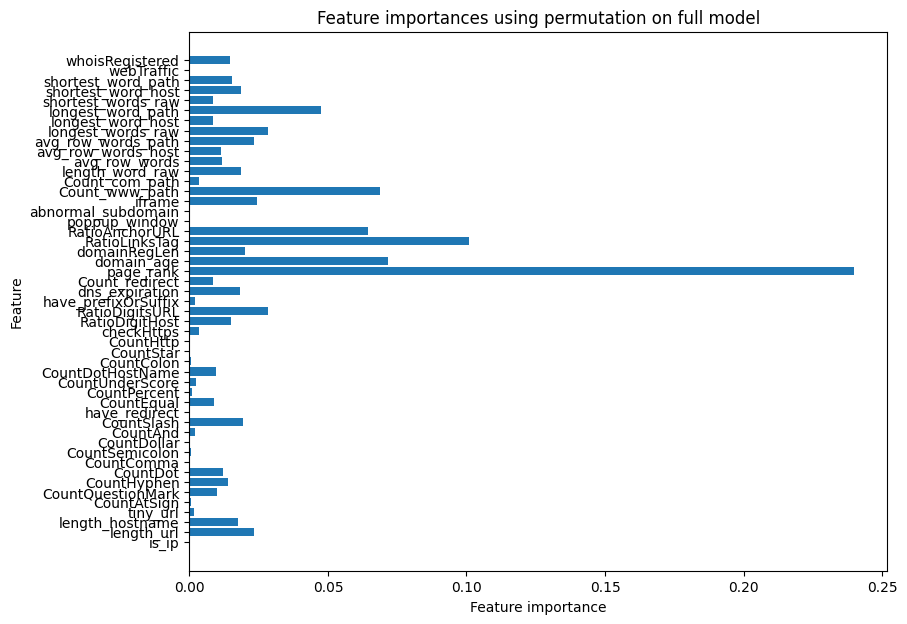

In [627]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), model_rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.columns[2:])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#Test

In [492]:

def create_vector(url):
  key = "wgowgcc4s4os0os8skw4wckw88s8wwkccwcsgcgg"
  flag = 1
  features = []
  response =""
  content =""
  text =""
  soup =""
  try:
    response = requests.get(url,timeout=5)
    content = response.content
    text = response.text
    soup = BeautifulSoup(response.text, 'html.parser')
  except:
    response = ""
    content =""
    text=""
    soup=""

  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    flag = 0
  features.append(fe.is_ip(url)),

  features.append(fe.length_url(url)),
  features.append(fe.length_hostname(url)),

  features.append(fe.tiny_url(url)),
  features.append(fe.countAtSign(url)),

  features.append(fe.countQuestionMark(url)),
  features.append(fe.countHyphen(url)),

  features.append(fe.countDot(url)),
  features.append(fe.countComma(url)),

  features.append(fe.countSemicolon(url)),
  features.append(fe.countDollar(url)),
  features.append(fe.countAnd(url)),

  features.append(fe.countSlash(url)),
  features.append(fe.have_redirect(url)),

  features.append(fe.CountEqual(url)),
  features.append(fe.CountPercent(url)),

  features.append(fe.CountUnderScore(url)),
  features.append(fe.CountDotHostName(url)),

  features.append(fe.CountColon(url)),
  features.append(fe.CountStar(url)),

  features.append(fe.CountHttp(url)),
  features.append(fe.check_https_protocol(url)),

  features.append(fe.RatioDigitsInHostname(url)),
  features.append(fe.RatioDigitsURL(url)),

  features.append(fe.have_prefixOrSuffix(url)),
  features.append(fe.dns_expiration(url)),

  features.append(fe.web_forwarding(response)),
  features.append(fe.page_rank(key,url)),

  features.append(0 if flag==0 else fe.DomainAge(domain_name)),
  features.append(0 if flag==0 else fe.DomainRegLen(domain_name)),
  features.append(fe.LinksInScriptTags(soup,url)),
  features.append(fe.AnchorURL(soup,url)),
  features.append(fe.popup_window(content)),
  features.append(fe.abnormal_subdomain(url)),
  features.append(fe.iframe(text)),

  features.append(fe.count_www_path(url)),
  features.append(fe.count_com_path(url)),
  features.append(fe.length_word_raw(url)),

  features.append(fe.average_word_length(fe.raw_words(url))),
  features.append(fe.average_word_length(fe.raw_words_host(url))),
  features.append(fe.average_word_length(fe.raw_words_path(url))),

  features.append(fe.longest_word_length(fe.raw_words(url))),
  features.append(fe.longest_word_length(fe.raw_words_host(url))),
  features.append(fe.longest_word_length(fe.raw_words_path(url))),

  features.append(fe.shortest_word_length(fe.raw_words(url))),
  features.append(fe.shortest_word_length(fe.raw_words_host(url))),
  features.append(fe.shortest_word_length(fe.raw_words_path(url))),
  features.append(fe.web_traffic(url)),
  features.append(fe.whois_registered_domain(url))

  return features


In [493]:
columns =[
  'is_ip',
  'length_url',
  'length_hostname',
  'tiny_url',
  'CountAtSign',
  'CountQuestionMark',
  'CountHyphen',
  'CountDot',
  'CountComma',
  'CountSemicolon',
  'CountDollar',
  'CountAnd',
  'CountSlash',
  'have_redirect',
  'CountEqual',
  'CountPercent',
  'CountUnderScore',
  'CountDotHostName',
  'CountColon',
  'CountStar',
  'CountHttp',
  'checkHttps',
  'RatioDigitHost',
  'RatioDigitsURL',
  'have_prefixOrSuffix',
  'dns_expiration',
  'Count_redirect',
  'page_rank',
  'domain_age',
  'domainRegLen',
  'RatioLinksTag',
  'RatioAnchorURL',
  'poppup_window',
  'abnormal_subdomain',
  'iframe',
  'Count_www_path',
  'Count_com_path',
  'length_word_raw',
  'avg_row_words',
  'avg_row_words_host',
  'avg_row_words_path',
  'longest_words_raw',
  'longest_word_host',
  'longest_word_path',
  'shortest_words_raw',
  'shortest_word_host',
  'shortest_word_path',
  'webTraffic',
  'whoisRegistered',

]

In [494]:
url = ['https://www.google.com/', 'http://205.174.165.80/CICDataset/ISCX-URL-2016/',
       'https://kotaku.com/the-witcher-3-wild-hunt-the-kotaku-review-1703766283',
       'http://docs.python.org:80/3/library/urllib.parse.html?',

       	'https://usps.address-shipwatchers.shop/',
       'https://grtakeprize.com/it/bp4f/index?c=2277&affId=BC6DC089&c1=48&c2=1opCaODZewbK&c3=1c1e607843434706847313349c7444a0&c4=&c7=&c5=&c8=&c6=&i1=&t1=',
       'https://t.ly/EWZo9','http://fis-lab.com/wp-includes/images/smilies/front/wwpp/',

       'https://www.kaggle.com/busrabetulcavusoglu/', 'https://www.tdtu.edu.vn']

In [495]:
url_list = []
for i in url:
  url_list.append(create_vector(i))

In [496]:
df = pd.DataFrame(url_list, columns= columns)

In [497]:
df

,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,CountComma,CountSemicolon,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,0,23,14,0,0,0,0,2,0,0,...,4.500000,0.000000,6,6,0,3,3,0,1107210325,0
1,1,47,14,0,0,0,2,3,0,0,...,2.750000,4.000000,10,3,10,2,2,2,0,0
2,0,71,10,0,0,0,8,1,0,0,...,6.000000,4.888889,10,6,10,1,6,1,2074472,0
3,0,54,15,0,0,1,0,4,0,0,...,5.000000,4.600000,7,6,7,1,4,1,12225752,0
4,0,39,30,0,0,0,1,2,0,0,...,7.666667,0.000000,12,12,0,4,4,0,0,0
5,0,145,15,0,0,1,0,1,0,0,...,11.000000,4.750000,32,11,32,1,11,1,0,0
6,0,18,4,0,0,0,0,1,0,0,...,1.000000,5.000000,5,1,5,1,1,5,600140,0
7,0,57,11,0,0,0,2,1,0,0,...,3.000000,5.333333,8,3,8,2,3,2,0,0
8,0,43,14,0,0,0,0,2,0,0,...,4.500000,19.000000,19,6,19,3,3,19,1711869,0
9,0,23,15,0,0,0,0,3,0,0,...,3.500000,0.000000,4,4,0,3,3,0,25847,0


In [521]:
df = scaler.fit_transform(df)

#Predict

In [628]:
rf_predict = model_rf.predict(df)

In [629]:
result = rf_predict.tolist()

In [630]:
expected = [0, 1, 0, 0, 1, 1, 1, 1, 0, 0]

In [631]:
combine = {'url': url, 'predict': result, 'expected': expected}

In [632]:
df_predict = pd.DataFrame(combine)

In [633]:
df_predict

,url,predict,expected
0,https://www.google.com/,0,0
1,http://205.174.165.80/CICDataset/ISCX-URL-2016/,1,1
2,https://kotaku.com/the-witcher-3-wild-hunt-the...,1,0
3,http://docs.python.org:80/3/library/urllib.par...,1,0
4,https://usps.address-shipwatchers.shop/,1,1
5,https://grtakeprize.com/it/bp4f/index?c=2277&a...,1,1
6,https://t.ly/EWZo9,1,1
7,http://fis-lab.com/wp-includes/images/smilies/...,1,1
8,https://www.kaggle.com/busrabetulcavusoglu/,1,0
9,https://www.tdtu.edu.vn,0,0
